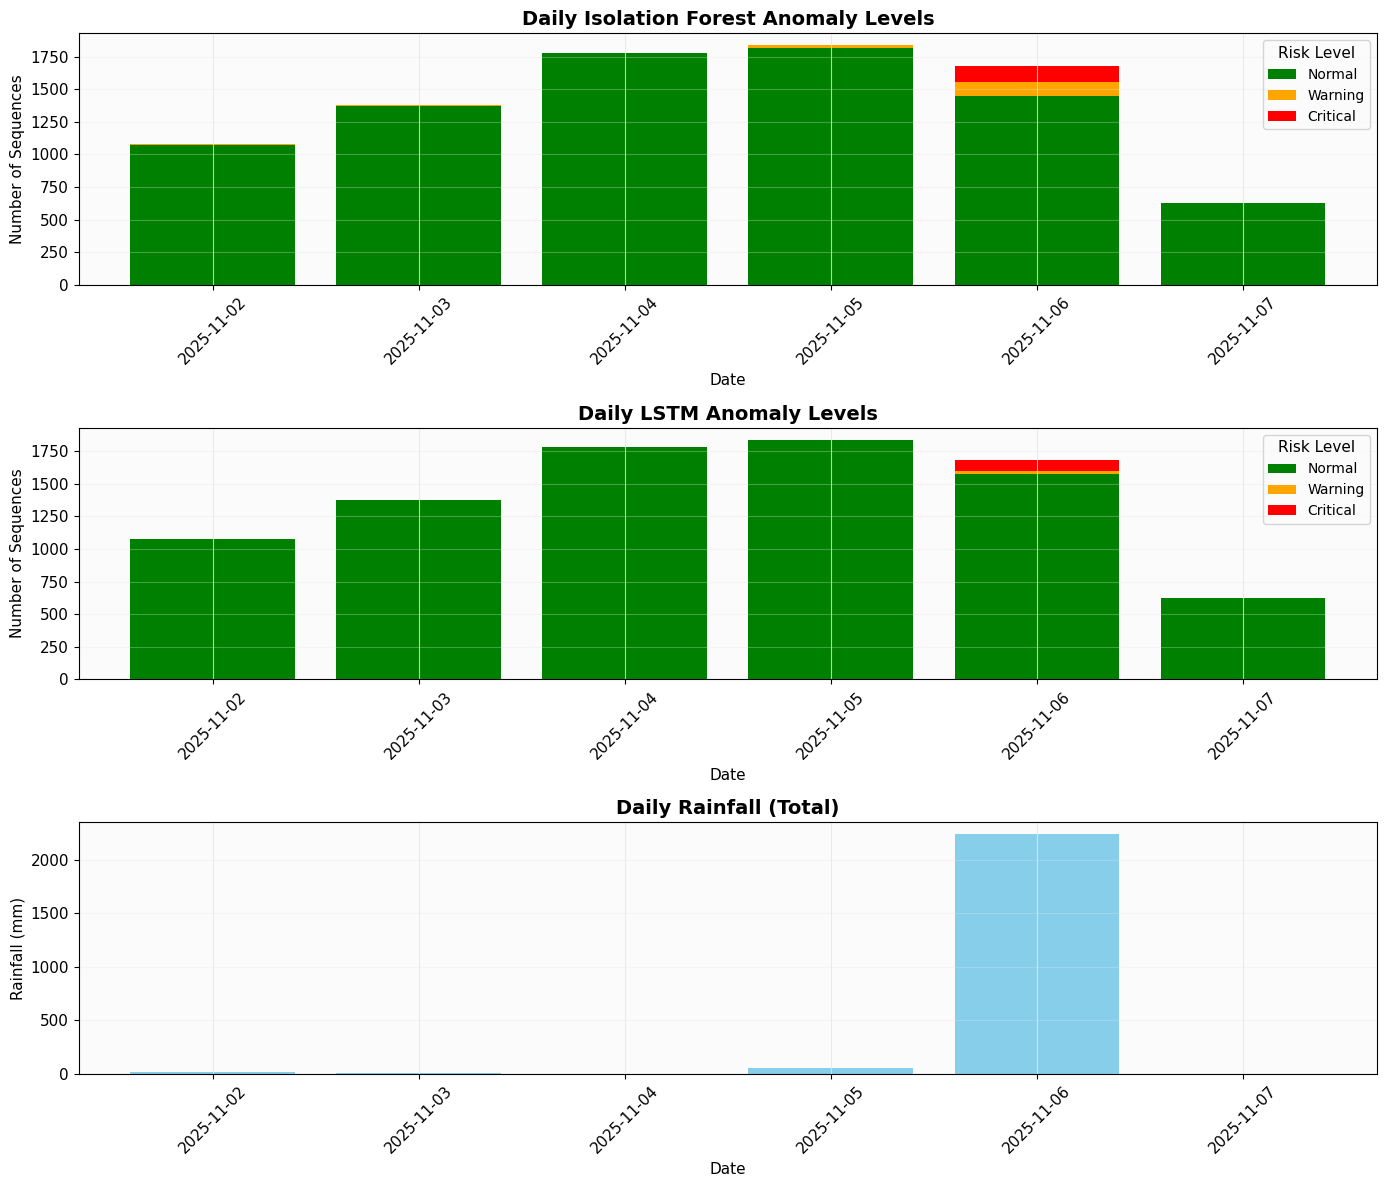


=== Isolation Forest Alert Summary ===
iso_risk_label
Normal      8113
Warning      139
Critical     122
dtype: int64

Total: 8374

=== LSTM Alert Summary ===
lstm_risk_label
Normal      8266
Warning       23
Critical      85
dtype: int64

Total: 8374

=== Rainfall Summary ===
count       6.000000
mean      385.409017
std       907.726660
min         0.000000
25%         3.422650
50%         9.080500
75%        43.446699
max      2237.854306
Name: rain, dtype: float64

Total Rainfall: 2312.45 mm
Days with Rain: 5 days
Days without Rain: 1 days

=== Daily Comparison ===
               Rainfall  ISO_Normal  ISO_Warning  ISO_Critical  LSTM_Normal  \
date                                                                          
2025-11-02    12.433300        1074            5             0         1079   
2025-11-03     5.727700        1374            2             0         1376   
2025-11-04     0.000000        1775            3             0         1778   
2025-11-05    53.784499     

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv('../data/dataSet3_prepared.csv')

# ลบคอลัมน์ที่ไม่ต้องการ
df = df.drop(columns=['iso_score', 'lstm_score', 'confidence', 'rf_risk'])

# กรอง
df = df[df['devID'] == 109]

# แปลง timestamp เป็น date
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# แปลงค่าตัวเลขเป็นชื่อ risk level
risk_mapping = {0: 'Normal', 1: 'Warning', 2: 'Critical'}
df['iso_risk_label'] = df['iso_risk'].map(risk_mapping)
df['lstm_risk_label'] = df['lstm_risk'].map(risk_mapping)

# กำหนดลำดับความเสี่ยง
risk_order = ['Normal', 'Warning', 'Critical']
colors = ['green', 'orange', 'red']

# สร้างกราฟ 3 แผนภูมิ
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# ===== Isolation Forest Alerts =====
iso_alerts = df.groupby(['date', 'iso_risk_label']).size().unstack(fill_value=0)

# เพิ่มคอลัมน์ที่ไม่มี
for risk in risk_order:
    if risk not in iso_alerts.columns:
        iso_alerts[risk] = 0

iso_alerts = iso_alerts[risk_order]

iso_alerts.plot(kind='bar', stacked=True, ax=axes[0], color=colors, width=0.8)
axes[0].set_title("Daily Isolation Forest Anomaly Levels", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Number of Sequences")
axes[0].grid(axis='y', alpha=0.3)
axes[0].legend(title="Risk Level")
axes[0].tick_params(axis='x', rotation=45)

# ===== LSTM Alerts =====
lstm_alerts = df.groupby(['date', 'lstm_risk_label']).size().unstack(fill_value=0)

# เพิ่มคอลัมน์ที่ไม่มี
for risk in risk_order:
    if risk not in lstm_alerts.columns:
        lstm_alerts[risk] = 0

lstm_alerts = lstm_alerts[risk_order]

lstm_alerts.plot(kind='bar', stacked=True, ax=axes[1], color=colors, width=0.8)
axes[1].set_title("Daily LSTM Anomaly Levels", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Number of Sequences")
axes[1].grid(axis='y', alpha=0.3)
axes[1].legend(title="Risk Level")
axes[1].tick_params(axis='x', rotation=45)

# ===== Rainfall =====
# คำนวณปริมาณฝนรายวัน (ผลรวม, เฉลี่ย, หรือค่าสูงสุด - เลือกตามความเหมาะสม)
daily_rain = df.groupby('date')['rain'].sum()  # หรือใช้ .mean() หรือ .max()

daily_rain.plot(kind='bar', ax=axes[2], color='skyblue', width=0.8)
axes[2].set_title("Daily Rainfall (Total)", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Rainfall (mm)")
axes[2].grid(axis='y', alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# แสดงสถิติเพิ่มเติม
print("\n=== Isolation Forest Alert Summary ===")
print(iso_alerts.sum())
print(f"\nTotal: {iso_alerts.sum().sum()}")

print("\n=== LSTM Alert Summary ===")
print(lstm_alerts.sum())
print(f"\nTotal: {lstm_alerts.sum().sum()}")

print("\n=== Rainfall Summary ===")
print(daily_rain.describe())
print(f"\nTotal Rainfall: {daily_rain.sum():.2f} mm")
print(f"Days with Rain: {(daily_rain > 0).sum()} days")
print(f"Days without Rain: {(daily_rain == 0).sum()} days")

# แสดงตารางเปรียบเทียบแต่ละวัน
print("\n=== Daily Comparison ===")
comparison = pd.DataFrame({
    'Rainfall': daily_rain,
    'ISO_Normal': iso_alerts['Normal'],
    'ISO_Warning': iso_alerts['Warning'],
    'ISO_Critical': iso_alerts['Critical'],
    'LSTM_Normal': lstm_alerts['Normal'],
    'LSTM_Warning': lstm_alerts['Warning'],
    'LSTM_Critical': lstm_alerts['Critical']
})
print(comparison.head(10))

In [12]:
df.describe()

,devID,soil,rain,temp,humi,geo,lat,lng,iso_risk,lstm_risk,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
count,8374.0,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,109.0,28.769387,0.276147,26.964010,85.264575,3.058775,8.868589,99.749509,0.045737,0.023048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,4.598553,2.155520,3.900681,12.672459,5.813799,0.000013,0.000954,0.269799,0.206936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,109.0,24.550000,0.000000,21.900000,44.099998,0.197623,8.868548,99.733330,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,109.0,26.600000,0.000000,23.700001,74.000000,0.381616,8.868580,99.749557,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,109.0,26.799999,0.000000,25.400000,92.099998,0.555755,8.868588,99.749565,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,109.0,27.000000,0.000000,30.650001,96.299999,3.707656,8.868596,99.749573,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,109.0,44.299999,33.947100,38.099998,98.300003,33.041203,8.868623,99.749596,2.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\ahmad\AppData\Local\Temp\ipykernel_16600\3383918009.py:142: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(critical_lstm.index, critical_lstm[col],
C:\Users\ahmad\AppData\Local\Temp\ipykernel_16600\3383918009.py:179: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[6].scatter(smoothed_at_lstm.index, smoothed_at_lstm.values, s=110, facecolors=PALETTE['lstm_crit'], edgecolors='k', linewidths=0.9, marker='x', zorder=7, label='LSTM Critical (smoothed)')


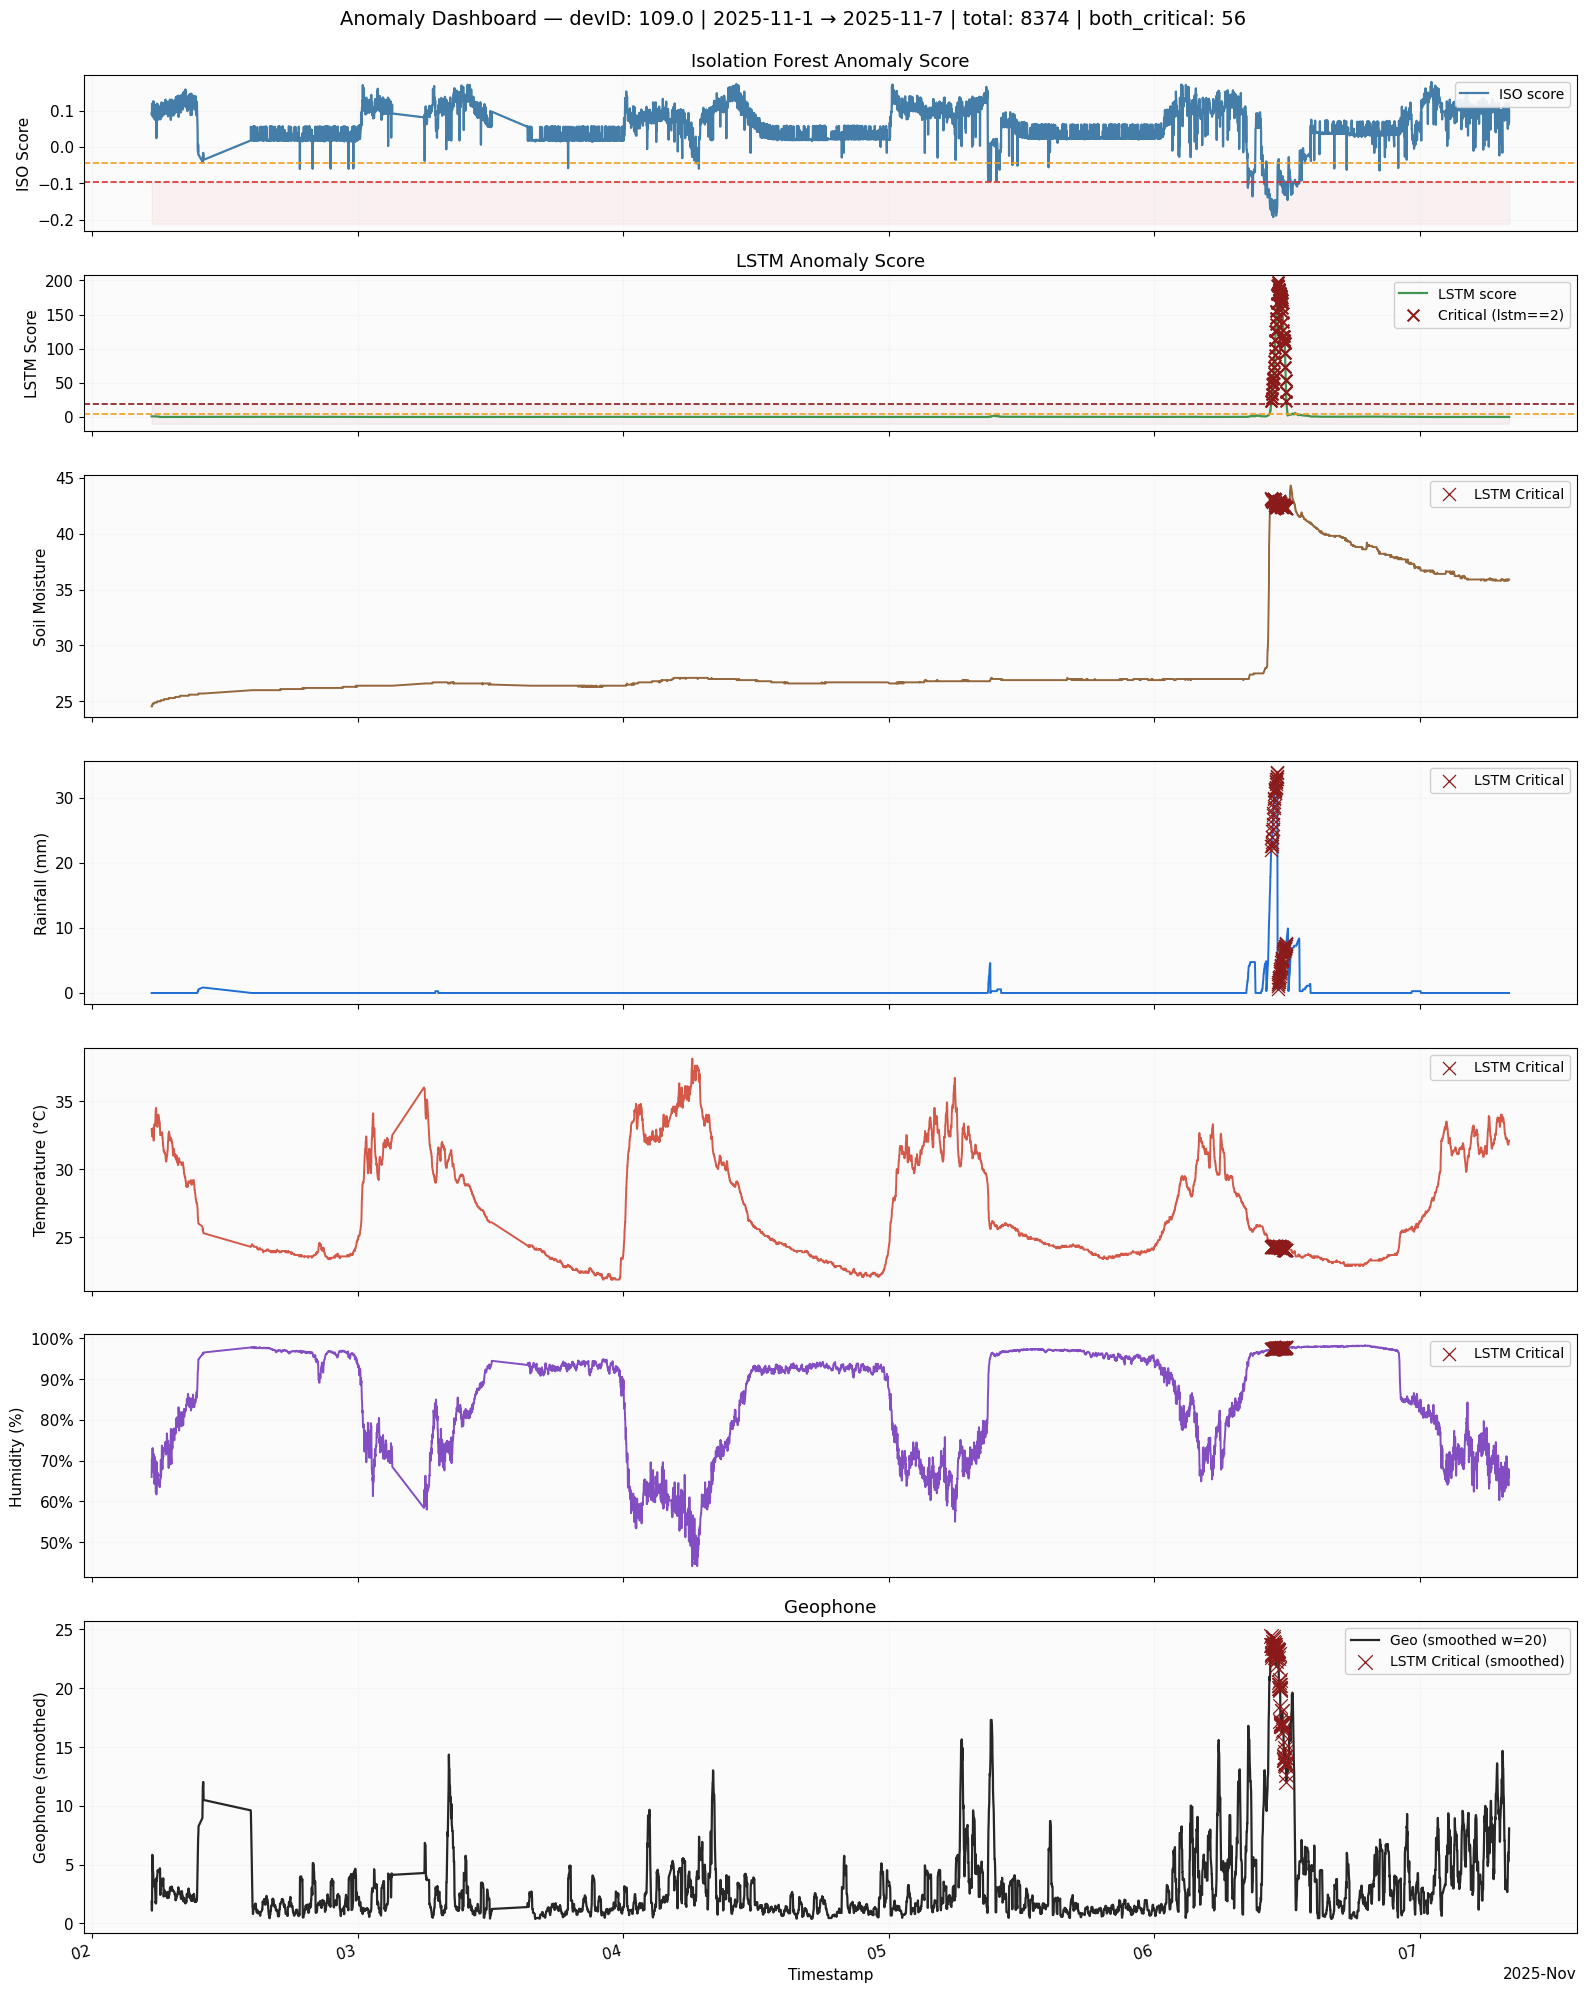


=== Anomaly Score Statistics (devID 109.0, 2025-11-1 to 2025-11-7) ===

Isolation Forest:
  Mean Score: 0.0575
  Warning Threshold: -0.0454
  Critical Threshold: -0.0977
  Warnings: 139 points
  Criticals: 122 points

LSTM:
  Mean Score: 1.4639
  Warning Threshold: 4.6058
  Critical Threshold: 18.6221
  Warnings: 23 points
  Criticals: 85 points

Both-critical points (iso==2 & lstm==2): 56
Total Data Points: 8374


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# =================== CONFIG (แก้ที่นี่ที่เดียว) ===================
CSV_PATH = '../data/dataSet3_prepared.csv'   # path ของ CSV
DEV_ID = 109.0                               # เลข devID ที่ต้องการกรอง
START_DATE = "2025-11-1"                    # วันเริ่ม (รวม)
END_DATE = "2025-11-7"                      # วันจบ (รวม)

# thresholds
ISO_WARN_THRESH = -0.045423
ISO_CRIT_THRESH = -0.097692
LSTM_WARN_THRESH = 4.605819
LSTM_CRIT_THRESH = 18.622055

# แสดง/ปิด จุดต่าง ๆ
SHOW_ISO_CRITICAL = False       # แสดงจุด Critical ของ ISO (iso_risk == 2)
SHOW_LSTM_CRITICAL = True      # แสดงจุด Critical ของ LSTM (lstm_risk == 2)
SHOW_BOTH_CRITICAL = False     # แสดงจุดที่ทั้งคู่เป็น Critical พร้อมกัน (iso==2 & lstm==2)
SHOW_WARNINGS = False           # แสดงจุด Warning (iso_risk==1, lstm_risk==1)

# รูป / smoothing
WINDOW_SIZE = 20
FIG_WIDTH = 16
FIG_HEIGHT = 20
FIGSIZE = (FIG_WIDTH, FIG_HEIGHT)
SAVE_PATH = None   # ตั้งเป็น 'output.png' ถ้าต้องการบันทึกรูป, หรือ None
DPI = 150
HSPACE = 0.9
# ================================================================

# ---------- สไตล์ / พาเลต ----------
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "#fbfbfc",
    "axes.grid": True,
    "grid.color": "#e6e6e6",
    "grid.alpha": 0.8,
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
})

PALETTE = {
    'iso_line': '#2f6f9f',
    'lstm_line': '#2b8a3e',
    'warning': '#f29c1f',
    'iso_crit': '#d9302a',   # red for iso critical
    'lstm_crit': '#8b1a1a',  # dark red for lstm critical
    'both_crit': '#a60014',  # both-critical color
    'soil': '#8b5a2b',
    'rain': '#0b62d1',
    'temp': '#d14b3a',
    'humi': '#7a3fbf',
    'geo': '#222222'
}

# ---------- โหลดข้อมูล และกรองช่วง ----------
df = pd.read_csv(CSV_PATH)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').sort_index()
df_dev = df[df['devID'] == float(DEV_ID)]
df_range = df_dev.loc[START_DATE:END_DATE].copy()

# ระบุจุด Warning / Critical
critical_iso = df_range[df_range.get('iso_risk') == 2]
warning_iso = df_range[df_range.get('iso_risk') == 1]
critical_lstm = df_range[df_range.get('lstm_risk') == 2]
warning_lstm = df_range[df_range.get('lstm_risk') == 1]
both_critical = df_range[(df_range.get('iso_risk') == 2) & (df_range.get('lstm_risk') == 2)]

# ---------- ฟังก์ชันช่วยปรับแกน x ----------
def _format_xaxis(ax):
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
    for label in ax.get_xticklabels():
        label.set_rotation(15)
        label.set_horizontalalignment('right')

# ---------- สร้าง figure ----------
height_ratios = [0.9, 0.9, 1.4, 1.4, 1.4, 1.4, 1.8]
fig, axs = plt.subplots(7, 1, figsize=FIGSIZE, sharex=True, gridspec_kw={'height_ratios': height_ratios})
fig.subplots_adjust(hspace=HSPACE, top=0.96, bottom=0.06)

# ---------- Plot ISO ----------
axs[0].plot(df_range.index, df_range.get('iso_score'), color=PALETTE['iso_line'], alpha=0.9, linewidth=1.6, label='ISO score')
if SHOW_WARNINGS:
    axs[0].scatter(warning_iso.index, warning_iso.get('iso_score'), color=PALETTE['warning'], s=56, marker='o', label='Warning (iso==1)', zorder=6, edgecolors='k', linewidths=0.7)
if SHOW_ISO_CRITICAL:
    axs[0].scatter(critical_iso.index, critical_iso.get('iso_score'), color=PALETTE['iso_crit'], s=72, marker='o', label='Critical (iso==2)', zorder=7, edgecolors='k', linewidths=1.0)
if SHOW_BOTH_CRITICAL and not both_critical.empty:
    axs[0].scatter(both_critical.index, both_critical.get('iso_score'), color=PALETTE['both_crit'], s=92, marker='D', label='Both Critical (iso & lstm == 2)', zorder=8, edgecolors='k', linewidths=1.1)
axs[0].axhline(y=ISO_WARN_THRESH, color=PALETTE['warning'], linestyle='--', linewidth=1.2)
axs[0].axhline(y=ISO_CRIT_THRESH, color=PALETTE['iso_crit'], linestyle='--', linewidth=1.2)
axs[0].fill_between(df_range.index, axs[0].get_ylim()[0], ISO_CRIT_THRESH, color=PALETTE['iso_crit'], alpha=0.05)
axs[0].set_ylabel("ISO Score")
axs[0].set_title("Isolation Forest Anomaly Score")
axs[0].legend(loc='upper right', framealpha=0.9)
axs[0].grid(True, alpha=0.25)

# ---------- Plot LSTM ----------
axs[1].plot(df_range.index, df_range.get('lstm_score'), color=PALETTE['lstm_line'], alpha=0.9, linewidth=1.6, label='LSTM score')
if SHOW_WARNINGS:
    axs[1].scatter(warning_lstm.index, warning_lstm.get('lstm_score'), color=PALETTE['warning'], s=56, marker='x', label='Warning (lstm==1)', zorder=6)
if SHOW_LSTM_CRITICAL:
    axs[1].scatter(critical_lstm.index, critical_lstm.get('lstm_score'), color=PALETTE['lstm_crit'], s=72, marker='x', label='Critical (lstm==2)', zorder=7)
if SHOW_BOTH_CRITICAL and not both_critical.empty:
    axs[1].scatter(both_critical.index, both_critical.get('lstm_score'), color=PALETTE['both_crit'], s=92, marker='D', label='Both Critical (iso & lstm == 2)', zorder=8)
axs[1].axhline(y=LSTM_WARN_THRESH, color=PALETTE['warning'], linestyle='--', linewidth=1.2)
axs[1].axhline(y=LSTM_CRIT_THRESH, color=PALETTE['lstm_crit'], linestyle='--', linewidth=1.2)
axs[1].fill_between(df_range.index, axs[1].get_ylim()[0], LSTM_CRIT_THRESH, color=PALETTE['lstm_crit'], alpha=0.05)
axs[1].set_ylabel("LSTM Score")
axs[1].set_title("LSTM Anomaly Score")
axs[1].legend(loc='upper right', framealpha=0.9)
axs[1].grid(True, alpha=0.25)

# ---------- ฟังก์ชันช่วย plot สัญญาณ (เลือกแสดง critical ตาม config) ----------
def plot_signal_conditional(ax, col, color, title, marker='o', y_formatter=None):
    if col not in df_range.columns:
        ax.text(0.5, 0.5, f"'{col}' not found", ha='center', va='center', transform=ax.transAxes, color='gray')
        ax.set_ylabel(title)
        return
    ax.plot(df_range.index, df_range[col], color=color, alpha=0.92, linewidth=1.4)
    shown_any = False
    # both_critical (ถ้าต้องการ)
    if SHOW_BOTH_CRITICAL and not both_critical.empty and col in both_critical.columns:
        ax.scatter(both_critical.index, both_critical[col],
                   s=110, facecolors=PALETTE['both_crit'], edgecolors='k', linewidths=1.0, marker='D', zorder=8, label='Both Critical')
        shown_any = True
    # iso critical
    if SHOW_ISO_CRITICAL and not critical_iso.empty and col in critical_iso.columns:
        # ถ้า both_critical ถูกเปิดแล้ว บางจุดจะทับกัน แต่ไม่เป็นปัญหา
        ax.scatter(critical_iso.index, critical_iso[col],
                   s=88, facecolors=PALETTE['iso_crit'], edgecolors='k', linewidths=0.9, marker='o', zorder=7, label='ISO Critical')
        shown_any = True
    # lstm critical
    if SHOW_LSTM_CRITICAL and not critical_lstm.empty and col in critical_lstm.columns:
        ax.scatter(critical_lstm.index, critical_lstm[col],
                   s=88, facecolors=PALETTE['lstm_crit'], edgecolors='k', linewidths=0.9, marker='x', zorder=7, label='LSTM Critical')
        shown_any = True
    # warnings (optional)
    if SHOW_WARNINGS:
        if col in warning_iso.columns:
            ax.scatter(warning_iso.index, warning_iso[col], s=56, facecolors='none', edgecolors=PALETTE['warning'], linewidths=0.9, marker='o', zorder=6, label='Warning (iso==1)' if not shown_any else None)
        if col in warning_lstm.columns:
            ax.scatter(warning_lstm.index, warning_lstm[col], s=56, facecolors='none', edgecolors=PALETTE['warning'], linewidths=0.9, marker='x', zorder=6, label='Warning (lstm==1)' if not shown_any else None)
    # legend ถ้ามีการแสดงจุด
    if shown_any or SHOW_WARNINGS:
        ax.legend(loc='upper right', framealpha=0.9)
    ax.set_ylabel(title)
    if y_formatter:
        ax.yaxis.set_major_formatter(y_formatter)
    ax.grid(True, alpha=0.22)

# ---------- soil / rain / temp / humi ----------
plot_signal_conditional(axs[2], 'soil', PALETTE['soil'], "Soil Moisture", marker='o')
plot_signal_conditional(axs[3], 'rain', PALETTE['rain'], "Rainfall (mm)", marker='s', y_formatter=FuncFormatter(lambda x, pos: f"{x:.0f}"))
plot_signal_conditional(axs[4], 'temp', PALETTE['temp'], "Temperature (°C)", marker='^')
plot_signal_conditional(axs[5], 'humi', PALETTE['humi'], "Humidity (%)", marker='d', y_formatter=FuncFormatter(lambda x, pos: f"{x:.0f}%"))

# ---------- geo (smoothed) ----------
if 'geo' in df_range.columns:
    smoothed_geo = df_range['geo'].rolling(window=WINDOW_SIZE, min_periods=1).mean()
    axs[6].plot(df_range.index, smoothed_geo, color=PALETTE['geo'], alpha=0.98, linewidth=1.6, label=f'Geo (smoothed w={WINDOW_SIZE})')
    # show both/iso/lstm critical on smoothed geo (use same logic but map values to smoothed series)
    smoothed_all = df_range['geo'].rolling(window=WINDOW_SIZE, min_periods=1).mean()
    if SHOW_BOTH_CRITICAL and not both_critical.empty:
        smoothed_at_both = smoothed_all.loc[smoothed_all.index.isin(both_critical.index)]
        axs[6].scatter(smoothed_at_both.index, smoothed_at_both.values, s=140, facecolors=PALETTE['both_crit'], edgecolors='k', linewidths=1.0, marker='D', zorder=8, label='Both Critical (smoothed)')
    if SHOW_ISO_CRITICAL and not critical_iso.empty:
        smoothed_at_iso = smoothed_all.loc[smoothed_all.index.isin(critical_iso.index)]
        axs[6].scatter(smoothed_at_iso.index, smoothed_at_iso.values, s=110, facecolors=PALETTE['iso_crit'], edgecolors='k', linewidths=0.9, marker='o', zorder=7, label='ISO Critical (smoothed)')
    if SHOW_LSTM_CRITICAL and not critical_lstm.empty:
        smoothed_at_lstm = smoothed_all.loc[smoothed_all.index.isin(critical_lstm.index)]
        axs[6].scatter(smoothed_at_lstm.index, smoothed_at_lstm.values, s=110, facecolors=PALETTE['lstm_crit'], edgecolors='k', linewidths=0.9, marker='x', zorder=7, label='LSTM Critical (smoothed)')
    if SHOW_WARNINGS:
        smoothed_warn_iso = smoothed_all.loc[smoothed_all.index.isin(warning_iso.index)]
        smoothed_warn_lstm = smoothed_all.loc[smoothed_all.index.isin(warning_lstm.index)]
        if not smoothed_warn_iso.empty:
            axs[6].scatter(smoothed_warn_iso.index, smoothed_warn_iso.values, s=70, facecolors='none', edgecolors=PALETTE['warning'], linewidths=0.9, marker='o', zorder=6)
        if not smoothed_warn_lstm.empty:
            axs[6].scatter(smoothed_warn_lstm.index, smoothed_warn_lstm.values, s=70, facecolors='none', edgecolors=PALETTE['warning'], linewidths=0.9, marker='x', zorder=6)
    axs[6].set_ylabel("Geophone (smoothed)")
    axs[6].set_title("Geophone")
    axs[6].legend(loc='upper right', framealpha=0.9)
    axs[6].grid(True, alpha=0.24)
else:
    axs[6].text(0.5, 0.5, "'geo' not found", ha='center', va='center', transform=axs[6].transAxes, color='gray')

# ---------- ปรับแกน x ----------
_format_xaxis(axs[-1])
axs[-1].set_xlabel("Timestamp")

# ---------- สรุปสถิติ ----------
stats = {
    'devID': DEV_ID,
    'start_date': START_DATE,
    'end_date': END_DATE,
    'total_points': len(df_range),
    'warning_iso_count': len(warning_iso),
    'critical_iso_count': len(critical_iso),
    'warning_lstm_count': len(warning_lstm),
    'critical_lstm_count': len(critical_lstm),
    'both_critical_count': len(both_critical),
    'iso_mean': df_range['iso_score'].mean() if 'iso_score' in df_range.columns else None,
    'lstm_mean': df_range['lstm_score'].mean() if 'lstm_score' in df_range.columns else None
}

summary_txt = f"devID: {stats['devID']} | {stats['start_date']} → {stats['end_date']} | total: {stats['total_points']} | both_critical: {stats['both_critical_count']}"
fig.suptitle("Anomaly Dashboard — " + summary_txt, fontsize=14, y=0.995)

# บันทึกรูปถ้าตั้ง SAVE_PATH
if SAVE_PATH:
    fig.savefig(SAVE_PATH, dpi=DPI, bbox_inches='tight')
    print(f"Saved figure to: {SAVE_PATH}")

plt.tight_layout()
plt.show()

# ---------- พิมพ์สถิติ ----------
print(f"\n=== Anomaly Score Statistics (devID {stats['devID']}, {stats['start_date']} to {stats['end_date']}) ===")
print(f"\nIsolation Forest:")
print(f"  Mean Score: {stats['iso_mean']:.4f}" if stats['iso_mean'] is not None else "  Mean Score: N/A")
print(f"  Warning Threshold: {ISO_WARN_THRESH:.4f}")
print(f"  Critical Threshold: {ISO_CRIT_THRESH:.4f}")
print(f"  Warnings: {stats['warning_iso_count']} points")
print(f"  Criticals: {stats['critical_iso_count']} points")

print(f"\nLSTM:")
print(f"  Mean Score: {stats['lstm_mean']:.4f}" if stats['lstm_mean'] is not None else "  Mean Score: N/A")
print(f"  Warning Threshold: {LSTM_WARN_THRESH:.4f}")
print(f"  Critical Threshold: {LSTM_CRIT_THRESH:.4f}")
print(f"  Warnings: {stats['warning_lstm_count']} points")
print(f"  Criticals: {stats['critical_lstm_count']} points")

print(f"\nBoth-critical points (iso==2 & lstm==2): {stats['both_critical_count']}")
print(f"Total Data Points: {stats['total_points']}")


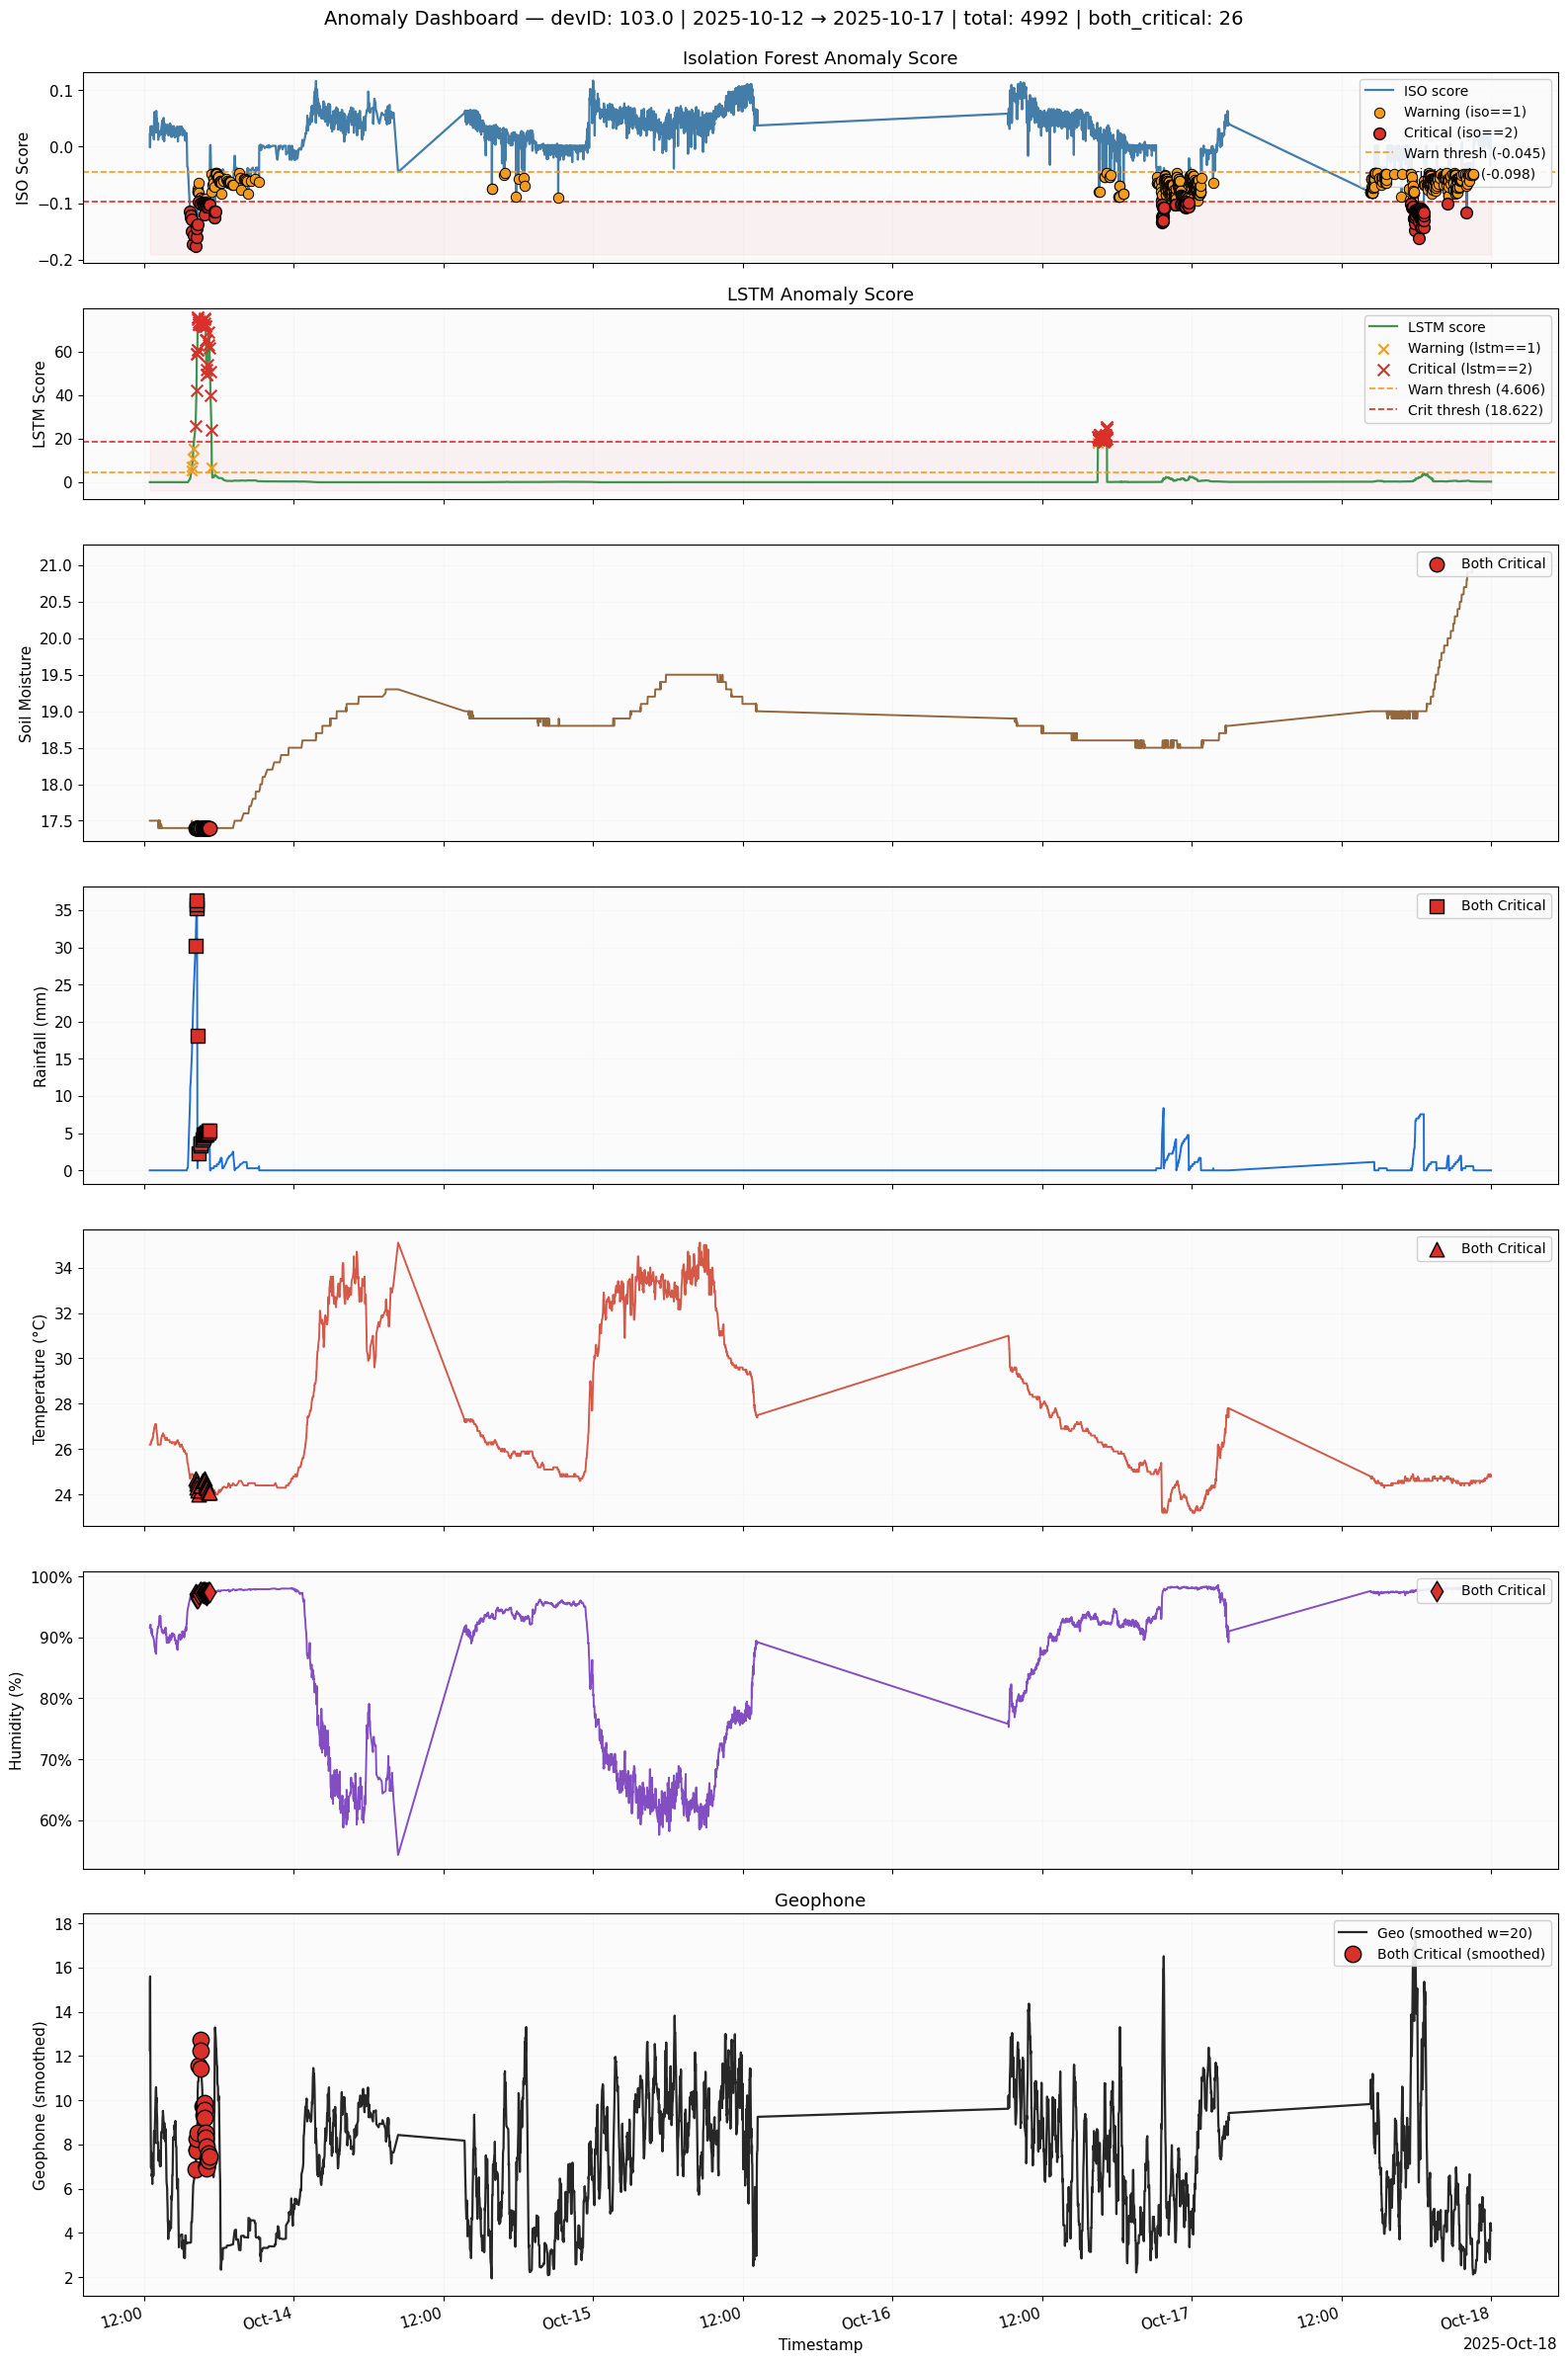


=== Anomaly Score Statistics (devID 103.0, 2025-10-12 to 2025-10-17) ===

Isolation Forest:
  Mean Score: 0.0174
  Warning Threshold: -0.0454
  Critical Threshold: -0.0977
  Warnings: 537 points
  Criticals: 136 points

LSTM:
  Mean Score: 1.0459
  Warning Threshold: 4.6058
  Critical Threshold: 18.6221
  Warnings: 6 points
  Criticals: 99 points

Both-critical points (iso==2 & lstm==2): 26
Total Data Points: 4992


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# =================== CONFIG (แก้ที่นี่ที่เดียว) ===================
CSV_PATH = '../data/dataSet2_prepared.csv'   # path ของ CSV
DEV_ID = 103.0                               # เลข devID ที่ต้องการกรอง
START_DATE = "2025-10-12"                    # วันเริ่ม (รวม)
END_DATE = "2025-10-17"                      # วันจบ (รวม)

# thresholds (ถ้าจะแก้เปลี่ยนตรงนี้)
ISO_WARN_THRESH = -0.045423
ISO_CRIT_THRESH = -0.097692
LSTM_WARN_THRESH = 4.605819
LSTM_CRIT_THRESH = 18.622055

# smoothing / รูป - ปรับความสูงที่นี่
WINDOW_SIZE = 20
FIG_WIDTH = 16
FIG_HEIGHT = 24          # <-- เพิ่มความสูงตรงนี้ (เดิม 14) ทำให้กราฟสูงขึ้น
FIGSIZE = (FIG_WIDTH, FIG_HEIGHT)
SAVE_PATH = None   # ตั้งเป็น 'output.png' ถ้าต้องการบันทึกรูป, หรือ None เพื่อไม่บันทึก
DPI = 150
HSPACE = 0.9        # เว้นช่องแนวตั้งระหว่าง subplots ให้กว้างขึ้น
# ================================================================

# ---------- สไตล์ / พาเลต ----------
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "#fbfbfc",
    "axes.grid": True,
    "grid.color": "#e6e6e6",
    "grid.alpha": 0.8,
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
})

PALETTE = {
    'iso': '#2f6f9f',
    'lstm': '#2b8a3e',
    'warning': '#f29c1f',
    'both': '#d9302a',
    'soil': '#8b5a2b',
    'rain': '#0b62d1',
    'temp': '#d14b3a',
    'humi': '#7a3fbf',
    'geo': '#222222'
}

# ---------- โหลดข้อมูล และกรองช่วง ----------
df = pd.read_csv(CSV_PATH)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').sort_index()
df_dev = df[df['devID'] == float(DEV_ID)]
df_range = df_dev.loc[START_DATE:END_DATE].copy()

# ระบุจุด Warning / Critical
critical_iso = df_range[df_range.get('iso_risk') == 2]
warning_iso = df_range[df_range.get('iso_risk') == 1]
critical_lstm = df_range[df_range.get('lstm_risk') == 2]
warning_lstm = df_range[df_range.get('lstm_risk') == 1]

# จุดที่ทั้งคู่เป็น critical พร้อมกัน (แสดงบน soil/rain/temp/humi/geo)
both_critical = df_range[(df_range.get('iso_risk') == 2) & (df_range.get('lstm_risk') == 2)]

# ---------- ฟังก์ชันช่วยปรับแกน x ----------
def _format_xaxis(ax):
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
    for label in ax.get_xticklabels():
        label.set_rotation(15)
        label.set_horizontalalignment('right')

# ---------- สร้าง figure ----------
# ปรับ height_ratios ให้สัญญาณมีพื้นที่มากขึ้น (ทำให้กราฟดูสูงขึ้น)
height_ratios = [0.9, 0.9, 1.4, 1.4, 1.4, 1.4, 1.8]  # iso, lstm, soil, rain, temp, humi, geo
fig, axs = plt.subplots(7, 1, figsize=FIGSIZE, sharex=True,
                        gridspec_kw={'height_ratios': height_ratios})
fig.subplots_adjust(hspace=HSPACE, top=0.96, bottom=0.06)

# ---------- Plot ISO ----------
axs[0].plot(df_range.index, df_range.get('iso_score'), color=PALETTE['iso'], alpha=0.9, linewidth=1.6, label='ISO score')
axs[0].scatter(warning_iso.index, warning_iso.get('iso_score'), color=PALETTE['warning'], s=56, marker='o', label='Warning (iso==1)', zorder=6, edgecolors='k', linewidths=0.7)
axs[0].scatter(critical_iso.index, critical_iso.get('iso_score'), color=PALETTE['both'], s=72, marker='o', label='Critical (iso==2)', zorder=7, edgecolors='k', linewidths=1.0)
axs[0].axhline(y=ISO_WARN_THRESH, color=PALETTE['warning'], linestyle='--', linewidth=1.2, label=f'Warn thresh ({ISO_WARN_THRESH:.3f})')
axs[0].axhline(y=ISO_CRIT_THRESH, color=PALETTE['both'], linestyle='--', linewidth=1.2, label=f'Crit thresh ({ISO_CRIT_THRESH:.3f})')
axs[0].fill_between(df_range.index, axs[0].get_ylim()[0], ISO_CRIT_THRESH, color=PALETTE['both'], alpha=0.05)
axs[0].set_ylabel("ISO Score")
axs[0].set_title("Isolation Forest Anomaly Score")
axs[0].legend(loc='upper right', framealpha=0.9)
axs[0].grid(True, alpha=0.25)

# ---------- Plot LSTM ----------
axs[1].plot(df_range.index, df_range.get('lstm_score'), color=PALETTE['lstm'], alpha=0.9, linewidth=1.6, label='LSTM score')
axs[1].scatter(warning_lstm.index, warning_lstm.get('lstm_score'), color=PALETTE['warning'], s=56, marker='x', label='Warning (lstm==1)', zorder=6)
axs[1].scatter(critical_lstm.index, critical_lstm.get('lstm_score'), color=PALETTE['both'], s=72, marker='x', label='Critical (lstm==2)', zorder=7)
axs[1].axhline(y=LSTM_WARN_THRESH, color=PALETTE['warning'], linestyle='--', linewidth=1.2, label=f'Warn thresh ({LSTM_WARN_THRESH:.3f})')
axs[1].axhline(y=LSTM_CRIT_THRESH, color=PALETTE['both'], linestyle='--', linewidth=1.2, label=f'Crit thresh ({LSTM_CRIT_THRESH:.3f})')
axs[1].fill_between(df_range.index, axs[1].get_ylim()[0], LSTM_CRIT_THRESH, color=PALETTE['both'], alpha=0.05)
axs[1].set_ylabel("LSTM Score")
axs[1].set_title("LSTM Anomaly Score")
axs[1].legend(loc='upper right', framealpha=0.9)
axs[1].grid(True, alpha=0.25)

# ---------- ฟังก์ชันช่วย plot สัญญาณ (แสดง scatter เฉพาะ both_critical) ----------
def plot_signal_with_both_crit(ax, col, color, title, marker='o', y_formatter=None):
    if col not in df_range.columns:
        ax.text(0.5, 0.5, f"'{col}' not found", ha='center', va='center', transform=ax.transAxes, color='gray')
        ax.set_ylabel(title)
        return
    ax.plot(df_range.index, df_range[col], color=color, alpha=0.92, linewidth=1.4)
    if not both_critical.empty and col in both_critical.columns:
        ax.scatter(both_critical.index, both_critical[col],
                   s=110, facecolors=PALETTE['both'], edgecolors='k', linewidths=1.0, marker=marker, zorder=8, label='Both Critical')
        ax.legend(loc='upper right', framealpha=0.9)
    ax.set_ylabel(title, fontsize=11)
    if y_formatter:
        ax.yaxis.set_major_formatter(y_formatter)
    ax.grid(True, alpha=0.22)

# ---------- soil / rain / temp / humi ----------
plot_signal_with_both_crit(axs[2], 'soil', PALETTE['soil'], "Soil Moisture", marker='o')
plot_signal_with_both_crit(axs[3], 'rain', PALETTE['rain'], "Rainfall (mm)", marker='s',
                           y_formatter=FuncFormatter(lambda x, pos: f"{x:.0f}"))
plot_signal_with_both_crit(axs[4], 'temp', PALETTE['temp'], "Temperature (°C)", marker='^')
plot_signal_with_both_crit(axs[5], 'humi', PALETTE['humi'], "Humidity (%)", marker='d',
                           y_formatter=FuncFormatter(lambda x, pos: f"{x:.0f}%"))

# ---------- geo (smoothed) ----------
if 'geo' in df_range.columns:
    smoothed_geo = df_range['geo'].rolling(window=WINDOW_SIZE, min_periods=1).mean()
    axs[6].plot(df_range.index, smoothed_geo, color=PALETTE['geo'], alpha=0.98, linewidth=1.6, label=f'Geo (smoothed w={WINDOW_SIZE})')
    if not both_critical.empty and 'geo' in both_critical.columns:
        smoothed_all = df_range['geo'].rolling(window=WINDOW_SIZE, min_periods=1).mean()
        smoothed_at_crit = smoothed_all.loc[smoothed_all.index.isin(both_critical.index)]
        axs[6].scatter(smoothed_at_crit.index, smoothed_at_crit.values,
                       s=140, facecolors=PALETTE['both'], edgecolors='k', linewidths=1.0, zorder=8, label='Both Critical (smoothed)')
    axs[6].set_ylabel("Geophone (smoothed)")
    axs[6].set_title("Geophone")
    axs[6].legend(loc='upper right', framealpha=0.9)
    axs[6].grid(True, alpha=0.24)
else:
    axs[6].text(0.5, 0.5, "'geo' not found", ha='center', va='center', transform=axs[6].transAxes, color='gray')

# ---------- ปรับแกน x ----------
_format_xaxis(axs[-1])
axs[-1].set_xlabel("Timestamp")

# ---------- สรุปสถิติ ----------
stats = {
    'devID': DEV_ID,
    'start_date': START_DATE,
    'end_date': END_DATE,
    'total_points': len(df_range),
    'warning_iso_count': len(warning_iso),
    'critical_iso_count': len(critical_iso),
    'warning_lstm_count': len(warning_lstm),
    'critical_lstm_count': len(critical_lstm),
    'both_critical_count': len(both_critical),
    'iso_mean': df_range['iso_score'].mean() if 'iso_score' in df_range.columns else None,
    'lstm_mean': df_range['lstm_score'].mean() if 'lstm_score' in df_range.columns else None
}

summary_txt = f"devID: {stats['devID']} | {stats['start_date']} → {stats['end_date']} | total: {stats['total_points']} | both_critical: {stats['both_critical_count']}"
fig.suptitle("Anomaly Dashboard — " + summary_txt, fontsize=14, y=0.995)

# บันทึกรูปถ้าตั้ง SAVE_PATH
if SAVE_PATH:
    fig.savefig(SAVE_PATH, dpi=DPI, bbox_inches='tight')
    print(f"Saved figure to: {SAVE_PATH}")

plt.tight_layout()
plt.show()

# ---------- พิมพ์สถิติ ----------
print(f"\n=== Anomaly Score Statistics (devID {stats['devID']}, {stats['start_date']} to {stats['end_date']}) ===")
print(f"\nIsolation Forest:")
print(f"  Mean Score: {stats['iso_mean']:.4f}" if stats['iso_mean'] is not None else "  Mean Score: N/A")
print(f"  Warning Threshold: {ISO_WARN_THRESH:.4f}")
print(f"  Critical Threshold: {ISO_CRIT_THRESH:.4f}")
print(f"  Warnings: {stats['warning_iso_count']} points")
print(f"  Criticals: {stats['critical_iso_count']} points")

print(f"\nLSTM:")
print(f"  Mean Score: {stats['lstm_mean']:.4f}" if stats['lstm_mean'] is not None else "  Mean Score: N/A")
print(f"  Warning Threshold: {LSTM_WARN_THRESH:.4f}")
print(f"  Critical Threshold: {LSTM_CRIT_THRESH:.4f}")
print(f"  Warnings: {stats['warning_lstm_count']} points")
print(f"  Criticals: {stats['critical_lstm_count']} points")

print(f"\nBoth-critical points (iso==2 & lstm==2): {stats['both_critical_count']}")
print(f"Total Data Points: {stats['total_points']}")


C:\Users\ahmad\AppData\Local\Temp\ipykernel_25160\3855682116.py:5: DtypeWarning: Columns (2,5,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Landslide_dataSet2.csv')
C:\Users\ahmad\AppData\Local\Temp\ipykernel_25160\3855682116.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True, errors='coerce')


=== วันที่มีฝนมากกว่า 5 mm ===
จำนวนวันทั้งหมด: 15 วัน

รายละเอียด:
                     max           sum          mean  count
date                                                       
2025-08-18  2.664510e+35  1.865157e+36  3.260764e+33    572
2025-08-25  6.910000e+01  3.015824e+03  4.142616e+00    728
2025-09-07  5.257837e+01  7.035059e+03  2.380731e+00   2955
2025-10-13  3.632200e+01  4.652010e+02  1.165917e+00    399
2025-08-26  3.464560e+01  1.423543e+03  2.013498e+00    707
2025-09-02  3.300000e+01  9.789310e+04  2.668114e+01   3669
2025-09-01  3.290000e+01  1.470138e+05  2.743307e+01   5359
2025-08-24  3.115000e+01  5.177700e+03  1.496445e+01    346
2025-08-14  3.080000e+01  1.221000e+02  3.052500e+01      4
2025-08-12  2.830000e+01  3.835000e+02  1.106782e-01   3465
2025-10-17  2.570480e+01  3.293474e+03  1.143567e+00   2880
2025-08-02  1.536700e+01  3.154147e+03  2.189315e-01  14407
2025-08-08  8.661400e+00  6.985000e+01  2.153206e-02   3244
2025-10-16  8.382000e+00  5.0864

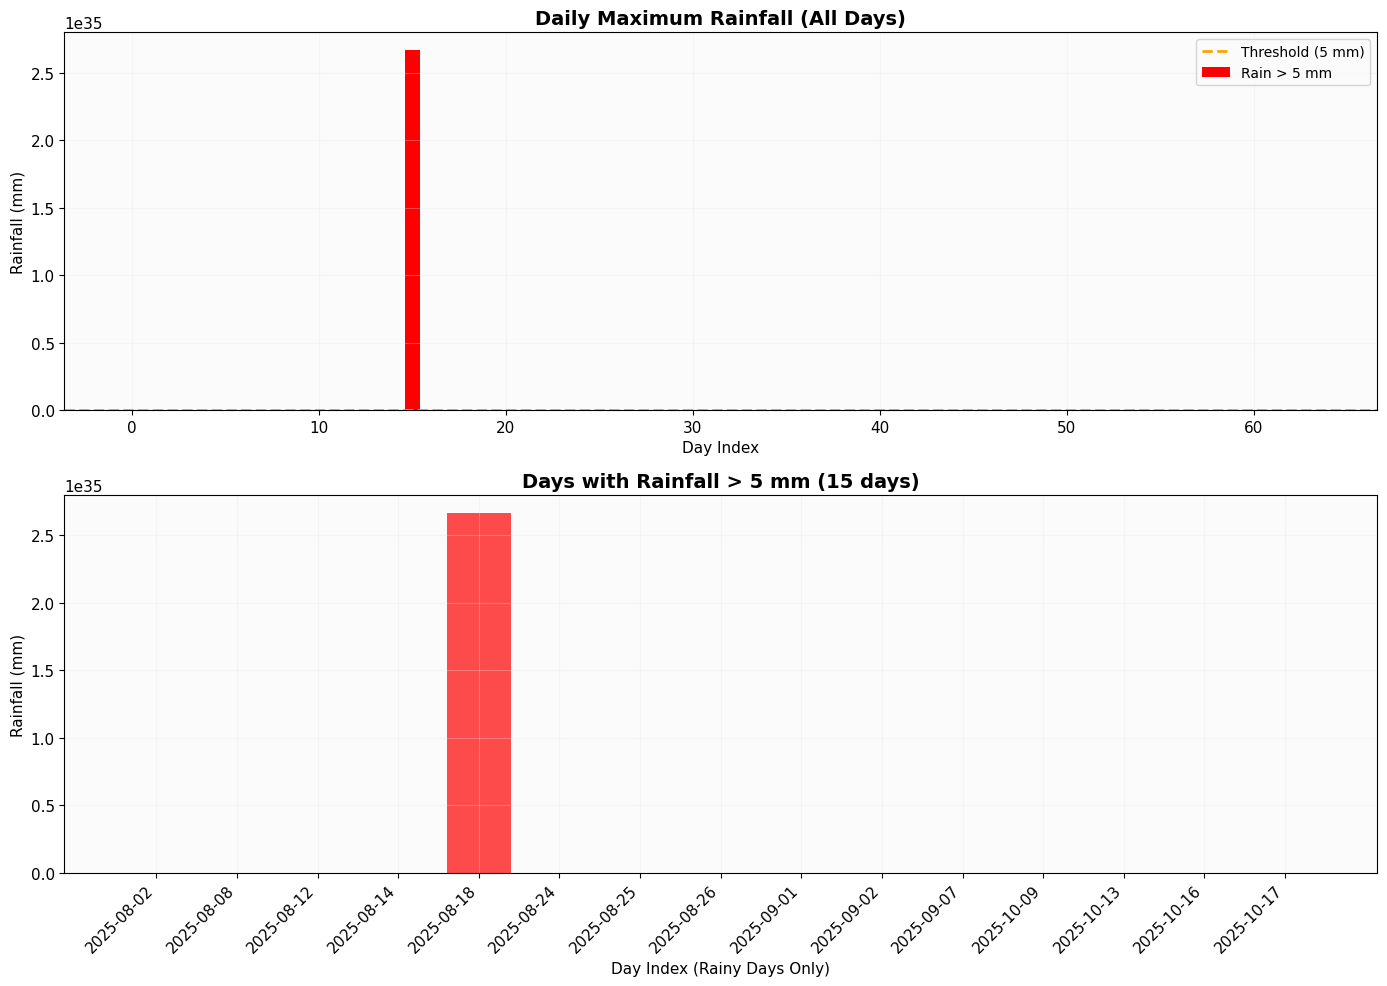


=== Top 10 วันที่ฝนตกหนักที่สุด ===
1. 2025-08-18: 266451000000000016652134308462460928.00 mm (sum: 1865157016888480240178424320693895168.00 mm, readings: 572)
2. 2025-08-25: 69.10 mm (sum: 3015.82 mm, readings: 728)
3. 2025-09-07: 52.58 mm (sum: 7035.06 mm, readings: 2955)
4. 2025-10-13: 36.32 mm (sum: 465.20 mm, readings: 399)
5. 2025-08-26: 34.65 mm (sum: 1423.54 mm, readings: 707)
6. 2025-09-02: 33.00 mm (sum: 97893.10 mm, readings: 3669)
7. 2025-09-01: 32.90 mm (sum: 147013.80 mm, readings: 5359)
8. 2025-08-24: 31.15 mm (sum: 5177.70 mm, readings: 346)
9. 2025-08-14: 30.80 mm (sum: 122.10 mm, readings: 4)
10. 2025-08-12: 28.30 mm (sum: 383.50 mm, readings: 3465)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv('../data/Landslide_dataSet2.csv')

# แปลง timestamp เป็น datetime (รองรับรูปแบบผสมกัน เช่น 'YYYY-MM-DD HH:MM:SS.ffffff' และ ISO 'YYYY-MM-DDTHH:MM:SS.ffffff')
# หากมีค่าที่ไม่สามารถแปลงได้ จะถูกตั้งเป็น NaT (errors='coerce') แล้วเราจะ drop แถวเหล่านั้น
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True, errors='coerce')

# แจ้งจำนวน timestamp ที่แปลงไม่ได้ (ถ้ามี) และลบแถวเหล่านั้น
n_invalid = df['timestamp'].isna().sum()
if n_invalid > 0:
    print(f"Warning: {n_invalid} timestamps could not be parsed and will be dropped.")
    df = df.dropna(subset=['timestamp']).reset_index(drop=True)

# สร้างคอลัมน์ date หลังจากแปลงเรียบร้อย
df['date'] = df['timestamp'].dt.date

# หาวันที่มีฝนมากกว่า 5 (ใช้ค่าสูงสุดของแต่ละวัน)
daily_rain = df.groupby('date')['rain'].agg(['max', 'sum', 'mean', 'count'])
rainy_days = daily_rain[daily_rain['max'] > 5]

print("=== วันที่มีฝนมากกว่า 5 mm ===")
print(f"จำนวนวันทั้งหมด: {len(rainy_days)} วัน")
print("\nรายละเอียด:")
print(rainy_days.sort_values('max', ascending=False))

# แสดงข้อมูลเพิ่มเติม
print("\n=== สถิติวันที่ฝนตกหนัก ===")
print(f"ฝนสูงสุด: {rainy_days['max'].max():.2f} mm")
print(f"ฝนเฉลี่ย (ในวันที่ฝนมากกว่า 5): {rainy_days['max'].mean():.2f} mm")

# สร้างกราฟแสดงวันที่มีฝนมากกว่า 5
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# กราฟที่ 1: แสดงฝนทุกวัน โดยไปไฮไลท์วันที่มากกว่า 5
daily_rain_all = df.groupby('date')['rain'].max()
axes[0].bar(range(len(daily_rain_all)), daily_rain_all.values, color='lightblue', alpha=0.6)
rainy_indices = [i for i, date in enumerate(daily_rain_all.index) if date in rainy_days.index]
rainy_values = [daily_rain_all.iloc[i] for i in rainy_indices]
axes[0].bar(rainy_indices, rainy_values, color='red', label='Rain > 5 mm')
axes[0].axhline(y=5, color='orange', linestyle='--', linewidth=2, label='Threshold (5 mm)')
axes[0].set_title("Daily Maximum Rainfall (All Days)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Day Index")
axes[0].set_ylabel("Rainfall (mm)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# กราฟที่ 2: แสดงเฉพาะวันที่ฝนมากกว่า 5
axes[1].bar(range(len(rainy_days)), rainy_days['max'].values, color='red', alpha=0.7)
axes[1].set_title(f"Days with Rainfall > 5 mm ({len(rainy_days)} days)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Day Index (Rainy Days Only)")
axes[1].set_ylabel("Rainfall (mm)")
axes[1].grid(True, alpha=0.3)

# ปรับ x-tick labels สำหรับกราฟที่ 2
if len(rainy_days) <= 30:
    axes[1].set_xticks(range(len(rainy_days)))
    axes[1].set_xticklabels([str(d) for d in rainy_days.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# แสดงรายละเอียดวันที่ฝนตกหนักที่สุด 10 อันดับแรก
print("\n=== Top 10 วันที่ฝนตกหนักที่สุด ===")
top_10 = rainy_days.sort_values('max', ascending=False).head(10)
for i, (date, row) in enumerate(top_10.iterrows(), 1):
    print(f"{i}. {date}: {row['max']:.2f} mm (sum: {row['sum']:.2f} mm, readings: {int(row['count'])})")
    
#4. 2025-10-13: 36.32 mm (sum: 465.20 mm, readings: 399)
#5. 2025-08-26: 34.65 mm (sum: 1423.54 mm, readings: 707)
# 10. 2025-08-12: 28.30 mm (sum: 383.50 mm, readings: 3465)

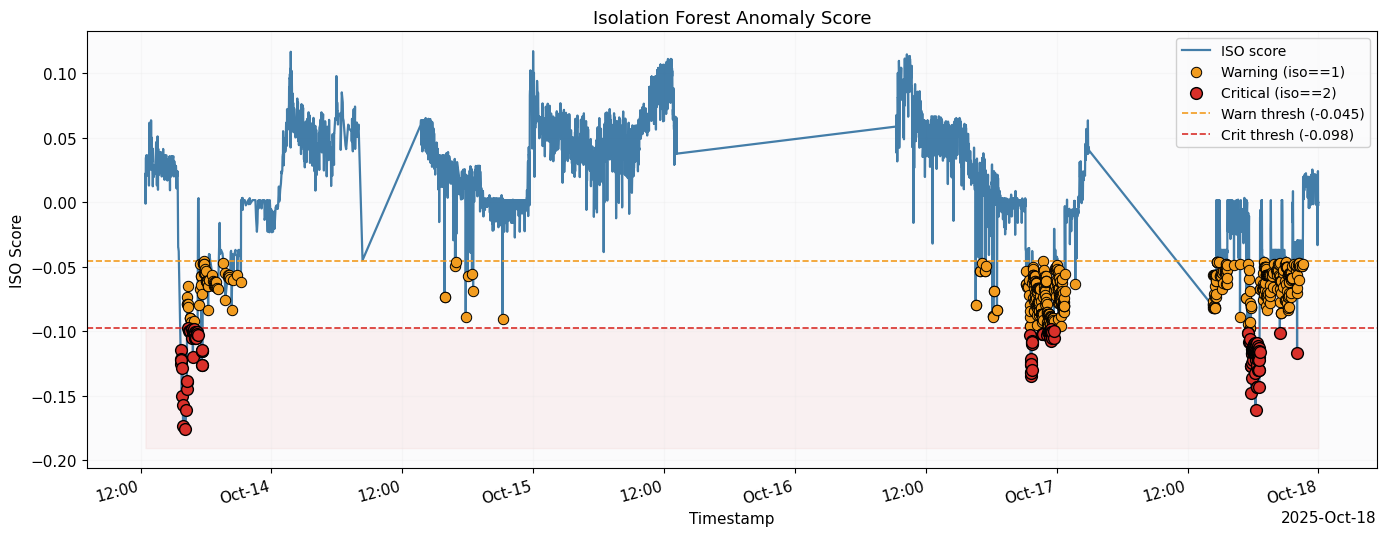

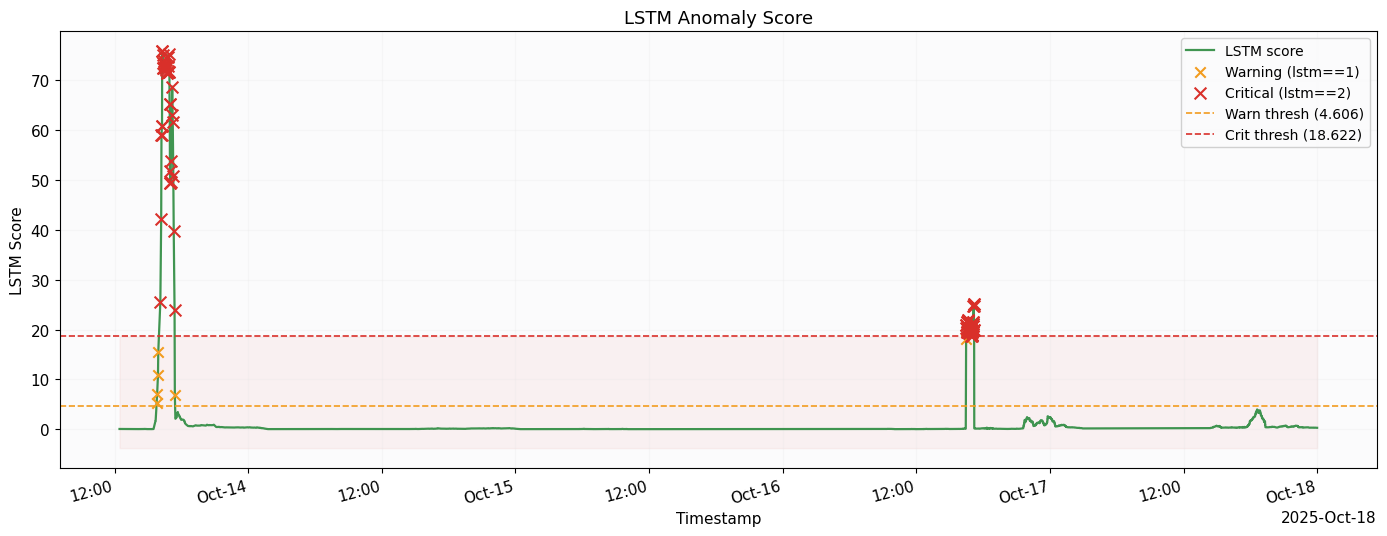

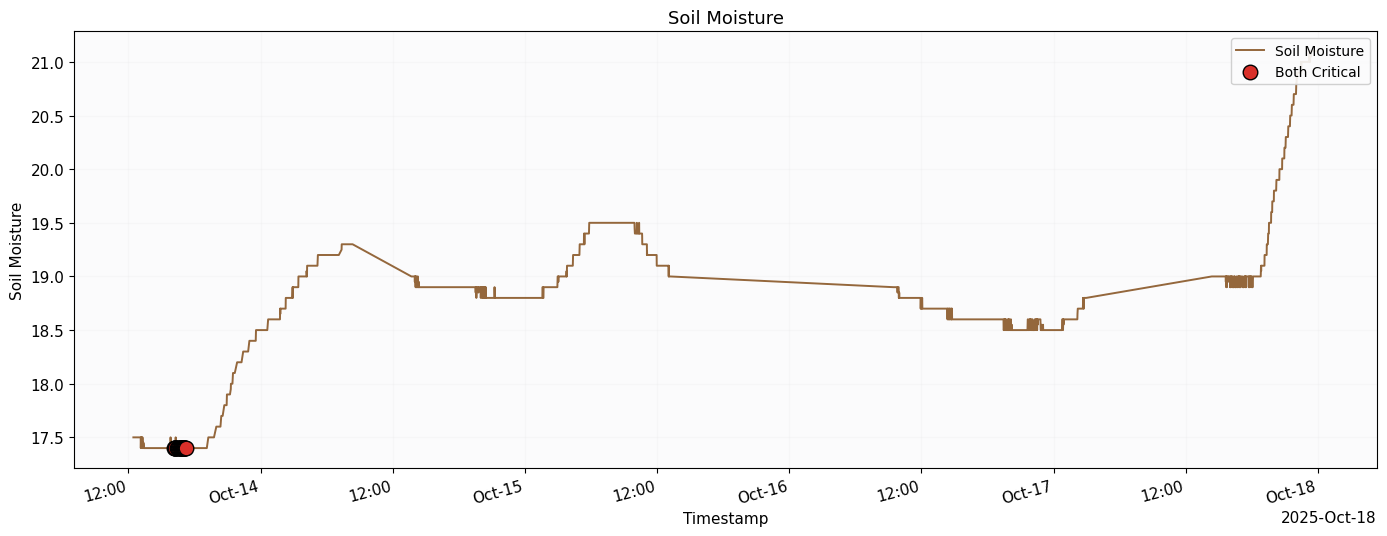

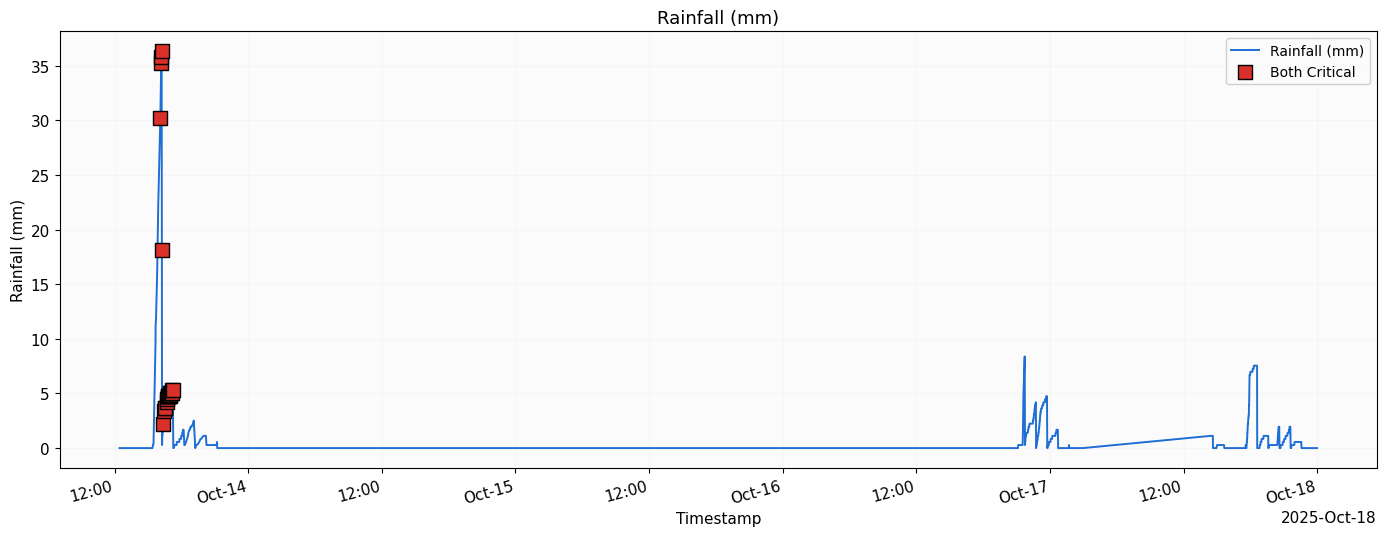

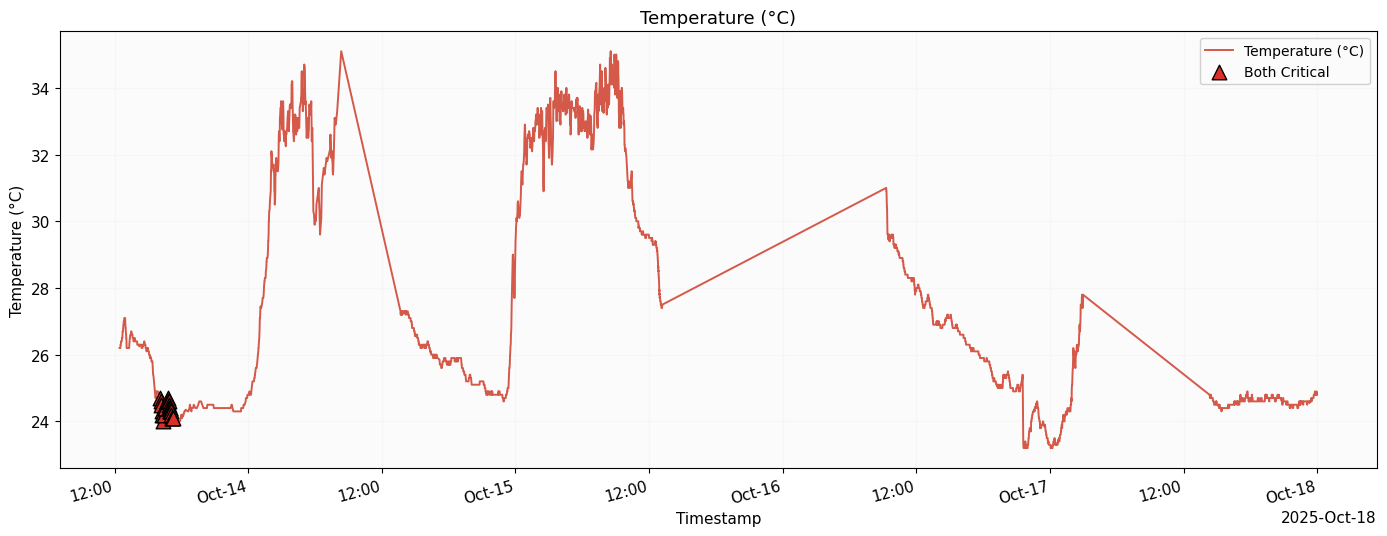

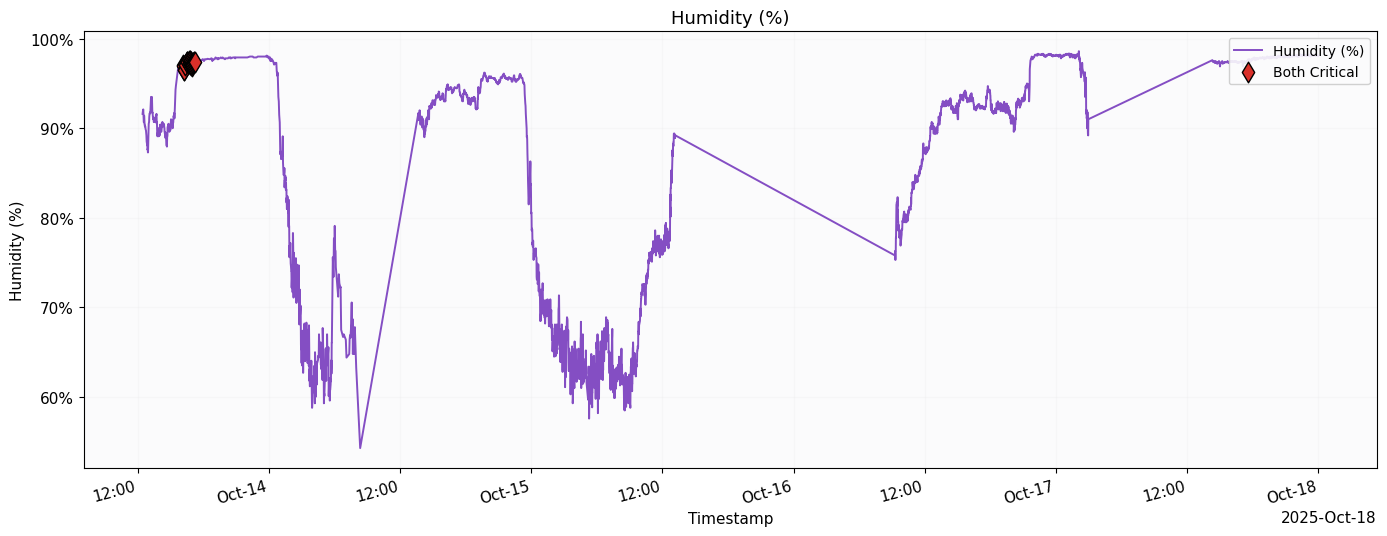

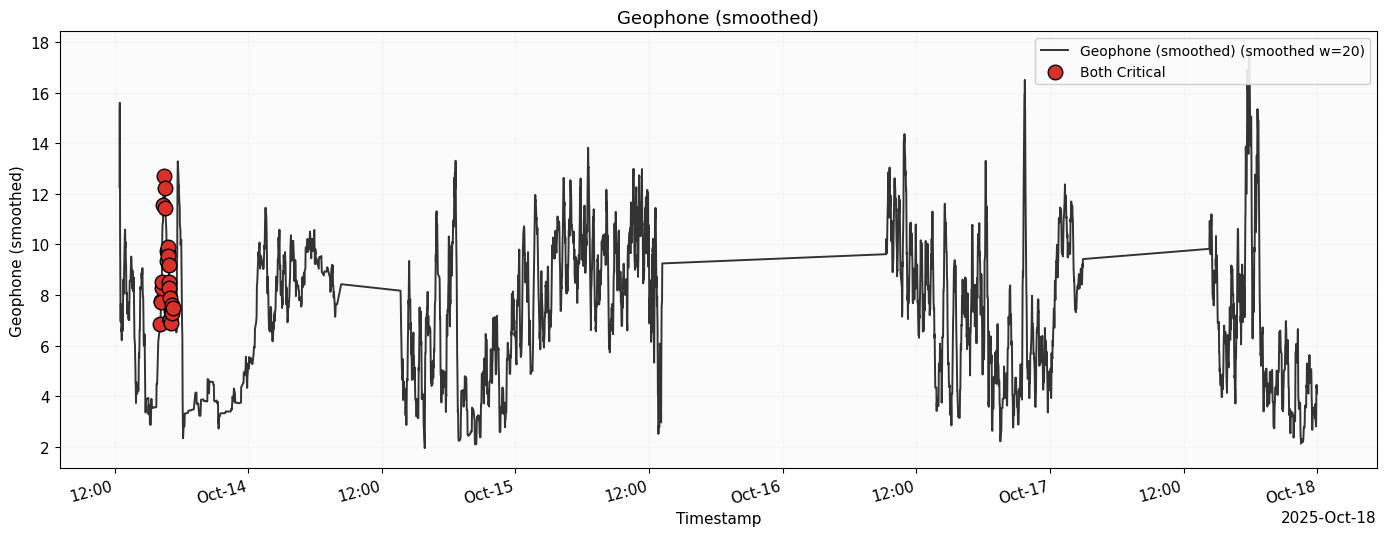


=== Anomaly Score Statistics (separate plots) ===
devID: 103.0 | 2025-10-12 → 2025-10-17
Total Data Points: 4992
Both-critical points (iso==2 & lstm==2): 26

Isolation Forest: warnings=537 | criticals=136 | mean=0.017353569690112806
LSTM: warnings=6 | criticals=99 | mean=1.0458834933333907


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# =================== CONFIG (แก้ที่นี่ที่เดียว) ===================
CSV_PATH = '../data/dataSet2_prepared.csv'   # path ของ CSV
DEV_ID = 103.0                              # เลข devID ที่ต้องการกรอง
START_DATE = "2025-10-12"                   # วันเริ่ม (รวม)
END_DATE = "2025-10-17"                     # วันจบ (รวม)

# thresholds (ถ้าจะแก้เปลี่ยนตรงนี้)
ISO_WARN_THRESH = -0.045423
ISO_CRIT_THRESH = -0.097692
LSTM_WARN_THRESH = 4.605819
LSTM_CRIT_THRESH = 18.622055

# smoothing / รูป - ปรับความสูงที่นี่
WINDOW_SIZE = 20

# ขนาดรูปเมื่อเป็นรูปเดี่ยว (width, height)
SINGLE_FIGSIZE = (14, 5.5)

# ตั้งค่าการบันทึกรูป
SAVE_EACH = False            # True ถ้าต้องการบันทึกทุกกราฟเป็นไฟล์
SAVE_DIR = "plots"           # โฟลเดอร์เก็บรูป (สร้างอัตโนมัติถ้าไม่มี)
DPI = 150
# ================================================================

# ---------- สไตล์ / พาเลต ----------
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "#fbfbfc",
    "axes.grid": True,
    "grid.color": "#e6e6e6",
    "grid.alpha": 0.8,
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
})

PALETTE = {
    'iso': '#2f6f9f',
    'lstm': '#2b8a3e',
    'warning': '#f29c1f',
    'both': '#d9302a',
    'soil': '#8b5a2b',
    'rain': '#0b62d1',
    'temp': '#d14b3a',
    'humi': '#7a3fbf',
    'geo': '#222222'
}

# ---------- โหลดข้อมูล และกรองช่วง ----------
df = pd.read_csv(CSV_PATH)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').sort_index()
df_dev = df[df['devID'] == float(DEV_ID)]
df_range = df_dev.loc[START_DATE:END_DATE].copy()

# mark points
critical_iso = df_range[df_range.get('iso_risk') == 2]
warning_iso = df_range[df_range.get('iso_risk') == 1]
critical_lstm = df_range[df_range.get('lstm_risk') == 2]
warning_lstm = df_range[df_range.get('lstm_risk') == 1]
both_critical = df_range[(df_range.get('iso_risk') == 2) & (df_range.get('lstm_risk') == 2)]

# สร้างโฟลเดอร์สำหรับบันทึกรูป (ถ้าต้องการ)
if SAVE_EACH:
    os.makedirs(SAVE_DIR, exist_ok=True)

# ---------- ฟังก์ชันช่วยปรับแกน x ----------
def _format_xaxis(ax):
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
    for label in ax.get_xticklabels():
        label.set_rotation(15)
        label.set_horizontalalignment('right')

# ---------- Plot ฟังก์ชันแยกแบบชัดเจน ----------
def plot_iso():
    fig, ax = plt.subplots(1, 1, figsize=SINGLE_FIGSIZE)
    ax.plot(df_range.index, df_range.get('iso_score'), color=PALETTE['iso'],
            alpha=0.9, linewidth=1.6, label='ISO score')
    ax.scatter(warning_iso.index, warning_iso.get('iso_score'),
               color=PALETTE['warning'], s=56, marker='o',
               label='Warning (iso==1)', zorder=6, edgecolors='k', linewidths=0.7)
    ax.scatter(critical_iso.index, critical_iso.get('iso_score'),
               color=PALETTE['both'], s=72, marker='o',
               label='Critical (iso==2)', zorder=7, edgecolors='k', linewidths=1.0)
    ax.axhline(y=ISO_WARN_THRESH, color=PALETTE['warning'], linestyle='--', linewidth=1.2,
               label=f'Warn thresh ({ISO_WARN_THRESH:.3f})')
    ax.axhline(y=ISO_CRIT_THRESH, color=PALETTE['both'], linestyle='--', linewidth=1.2,
               label=f'Crit thresh ({ISO_CRIT_THRESH:.3f})')
    # เติมพื้นที่ด้านล่างถึงค่า crit
    ymin, ymax = ax.get_ylim()
    ax.fill_between(df_range.index, ymin, ISO_CRIT_THRESH, color=PALETTE['both'], alpha=0.05)
    ax.set_ylabel("ISO Score")
    ax.set_title("Isolation Forest Anomaly Score")
    ax.legend(loc='upper right', framealpha=0.9)
    ax.grid(True, alpha=0.25)
    _format_xaxis(ax)
    ax.set_xlabel("Timestamp")
    fig.tight_layout()
    if SAVE_EACH:
        path = os.path.join(SAVE_DIR, f"dev{int(DEV_ID)}_iso.png")
        fig.savefig(path, dpi=DPI, bbox_inches='tight')
        print(f"Saved: {path}")
    plt.show()
    plt.close(fig)

def plot_lstm():
    fig, ax = plt.subplots(1, 1, figsize=SINGLE_FIGSIZE)
    ax.plot(df_range.index, df_range.get('lstm_score'), color=PALETTE['lstm'],
            alpha=0.9, linewidth=1.6, label='LSTM score')
    ax.scatter(warning_lstm.index, warning_lstm.get('lstm_score'),
               color=PALETTE['warning'], s=56, marker='x',
               label='Warning (lstm==1)', zorder=6)
    ax.scatter(critical_lstm.index, critical_lstm.get('lstm_score'),
               color=PALETTE['both'], s=72, marker='x',
               label='Critical (lstm==2)', zorder=7)
    ax.axhline(y=LSTM_WARN_THRESH, color=PALETTE['warning'], linestyle='--', linewidth=1.2,
               label=f'Warn thresh ({LSTM_WARN_THRESH:.3f})')
    ax.axhline(y=LSTM_CRIT_THRESH, color=PALETTE['both'], linestyle='--', linewidth=1.2,
               label=f'Crit thresh ({LSTM_CRIT_THRESH:.3f})')
    ymin, ymax = ax.get_ylim()
    ax.fill_between(df_range.index, ymin, LSTM_CRIT_THRESH, color=PALETTE['both'], alpha=0.05)
    ax.set_ylabel("LSTM Score")
    ax.set_title("LSTM Anomaly Score")
    ax.legend(loc='upper right', framealpha=0.9)
    ax.grid(True, alpha=0.25)
    _format_xaxis(ax)
    ax.set_xlabel("Timestamp")
    fig.tight_layout()
    if SAVE_EACH:
        path = os.path.join(SAVE_DIR, f"dev{int(DEV_ID)}_lstm.png")
        fig.savefig(path, dpi=DPI, bbox_inches='tight')
        print(f"Saved: {path}")
    plt.show()
    plt.close(fig)

def plot_signal(col, color, title, marker='o', y_formatter=None, smooth=False):
    fig, ax = plt.subplots(1, 1, figsize=SINGLE_FIGSIZE)
    if col not in df_range.columns:
        ax.text(0.5, 0.5, f"'{col}' not found", ha='center', va='center', transform=ax.transAxes, color='gray')
        ax.set_ylabel(title)
        fig.tight_layout()
        plt.show()
        plt.close(fig)
        return
    if smooth:
        series = df_range[col].rolling(window=WINDOW_SIZE, min_periods=1).mean()
        label = f"{title} (smoothed w={WINDOW_SIZE})"
    else:
        series = df_range[col]
        label = title
    ax.plot(df_range.index, series, color=color, alpha=0.92, linewidth=1.4, label=label)
    # ถ้ามี both_critical ให้เน้นจุดตรงช่วงนั้น (ถ้าคอลัมน์มี)
    if not both_critical.empty and col in both_critical.columns:
        # ถ้าใช้ smoothing ให้ดึงค่า smoothed ที่ index ของ both_critical
        if smooth:
            sm = df_range[col].rolling(window=WINDOW_SIZE, min_periods=1).mean()
            sm_at = sm.loc[sm.index.isin(both_critical.index)]
            ax.scatter(sm_at.index, sm_at.values, s=110, facecolors=PALETTE['both'],
                       edgecolors='k', linewidths=1.0, marker=marker, zorder=8, label='Both Critical')
        else:
            ax.scatter(both_critical.index, both_critical[col], s=110, facecolors=PALETTE['both'],
                       edgecolors='k', linewidths=1.0, marker=marker, zorder=8, label='Both Critical')
        ax.legend(loc='upper right', framealpha=0.9)
    ax.set_ylabel(title, fontsize=11)
    if y_formatter:
        ax.yaxis.set_major_formatter(y_formatter)
    ax.grid(True, alpha=0.22)
    ax.set_title(title)
    _format_xaxis(ax)
    ax.set_xlabel("Timestamp")
    fig.tight_layout()
    if SAVE_EACH:
        sanitized = col.replace(" ", "_")
        path = os.path.join(SAVE_DIR, f"dev{int(DEV_ID)}_{sanitized}.png")
        fig.savefig(path, dpi=DPI, bbox_inches='tight')
        print(f"Saved: {path}")
    plt.show()
    plt.close(fig)

# ---------- เรียกฟังก์ชันเพื่อแสดงกราฟทีละภาพ ----------
plot_iso()
plot_lstm()
plot_signal('soil', PALETTE['soil'], "Soil Moisture", marker='o')
plot_signal('rain', PALETTE['rain'], "Rainfall (mm)", marker='s',
            y_formatter=FuncFormatter(lambda x, pos: f"{x:.0f}"))
plot_signal('temp', PALETTE['temp'], "Temperature (°C)", marker='^')
plot_signal('humi', PALETTE['humi'], "Humidity (%)", marker='d',
            y_formatter=FuncFormatter(lambda x, pos: f"{x:.0f}%"))
# geo: แสดงแบบ smoothing
plot_signal('geo', PALETTE['geo'], "Geophone (smoothed)", marker='o', smooth=True)

# ---------- แสดงสรุปสถิติเล็กน้อย (แยกเป็นตัวเลข ไม่รวมกราฟ) ----------
stats = {
    'devID': DEV_ID,
    'start_date': START_DATE,
    'end_date': END_DATE,
    'total_points': len(df_range),
    'warning_iso_count': len(warning_iso),
    'critical_iso_count': len(critical_iso),
    'warning_lstm_count': len(warning_lstm),
    'critical_lstm_count': len(critical_lstm),
    'both_critical_count': len(both_critical),
    'iso_mean': df_range['iso_score'].mean() if 'iso_score' in df_range.columns else None,
    'lstm_mean': df_range['lstm_score'].mean() if 'lstm_score' in df_range.columns else None
}

print("\n=== Anomaly Score Statistics (separate plots) ===")
print(f"devID: {stats['devID']} | {stats['start_date']} → {stats['end_date']}")
print(f"Total Data Points: {stats['total_points']}")
print(f"Both-critical points (iso==2 & lstm==2): {stats['both_critical_count']}")
print(f"\nIsolation Forest: warnings={stats['warning_iso_count']} | criticals={stats['critical_iso_count']} | mean={stats['iso_mean']}")
print(f"LSTM: warnings={stats['warning_lstm_count']} | criticals={stats['critical_lstm_count']} | mean={stats['lstm_mean']}")


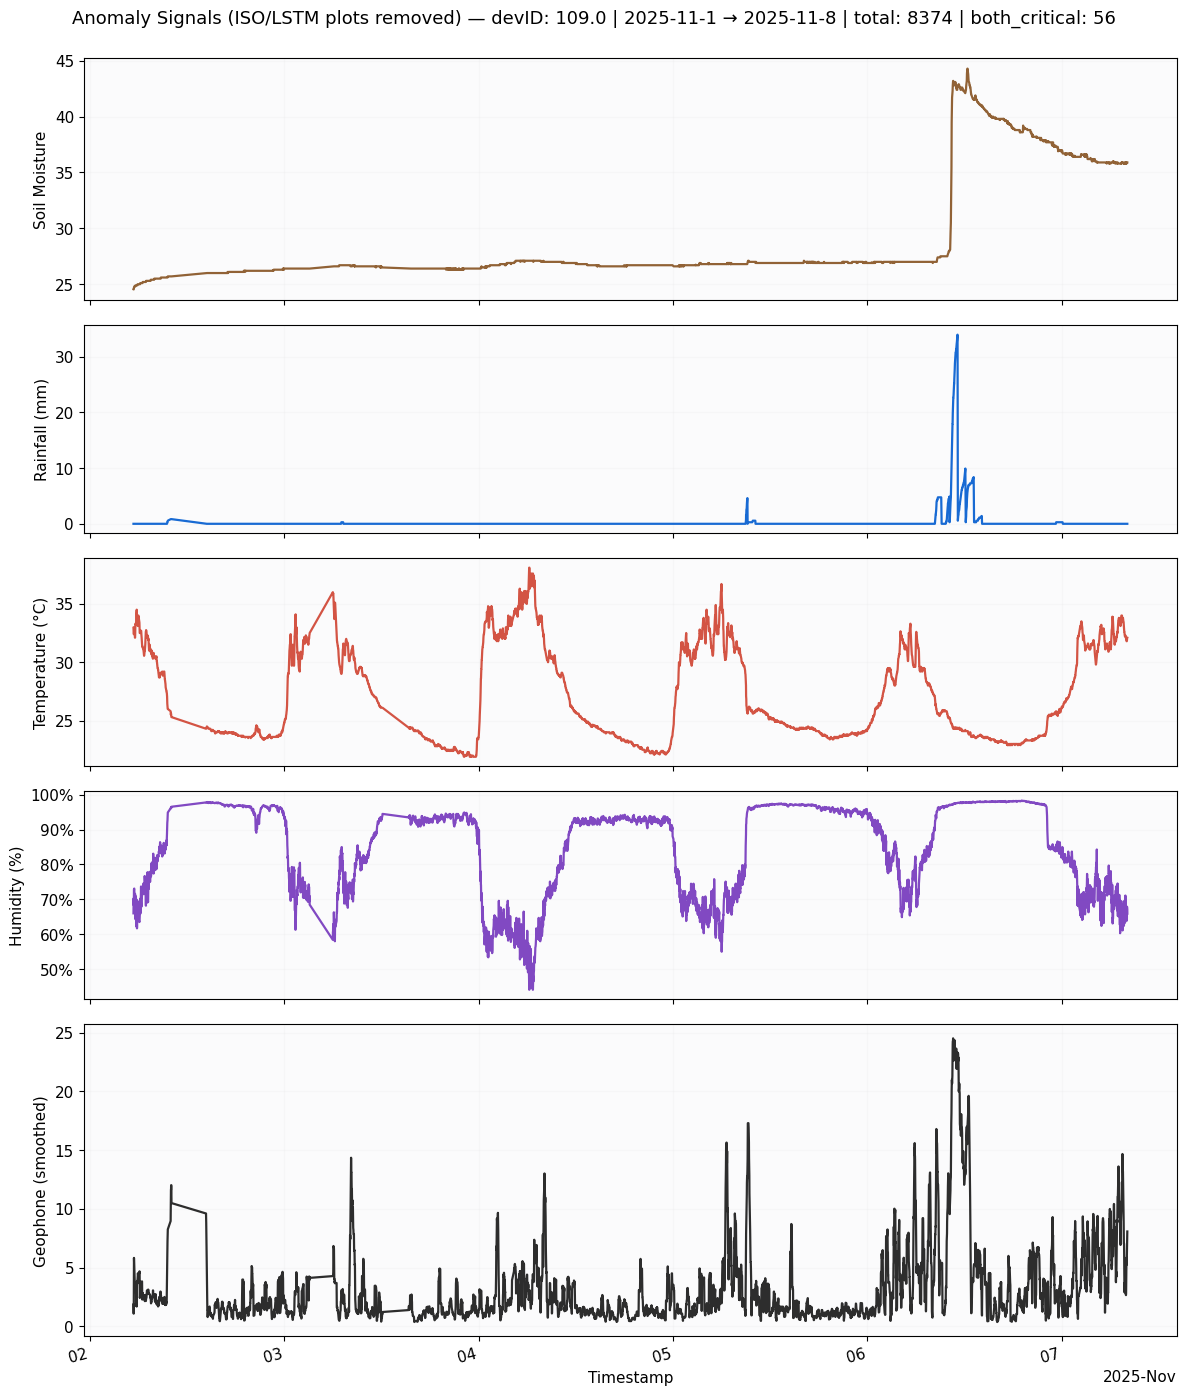


=== Summary (devID 109.0, 2025-11-1 to 2025-11-8) ===
 Total data points: 8374
 Both-critical points (iso==2 & lstm==2): 56

Isolation Forest: warnings=139, criticals=122, mean=0.05746067110128842
LSTM: warnings=23, criticals=85, mean=1.463945321202013


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# =================== CONFIG (แก้ที่นี่ที่เดียว) ===================
CSV_PATH = '../data/dataSet3_prepared.csv'   # path ของ CSV
DEV_ID = 109.0                               # เลข devID ที่ต้องการกรอง
START_DATE = "2025-11-1"                    # วันเริ่ม (รวม)
END_DATE = "2025-11-8"                      # วันจบ (รวม)

# thresholds (ยังเก็บไว้แต่จะไม่ใช้ในการวาด)
ISO_WARN_THRESH = -0.045423
ISO_CRIT_THRESH = -0.097692
LSTM_WARN_THRESH = 4.605819
LSTM_CRIT_THRESH = 18.622055

# smoothing / รูป
WINDOW_SIZE = 20
FIG_WIDTH = 12
FIG_HEIGHT = 14
FIGSIZE = (FIG_WIDTH, FIG_HEIGHT)
SAVE_PATH = None   # ตั้งเป็น 'output.png' ถ้าต้องการบันทึกรูป, หรือ None เพื่อไม่บันทึก
DPI = 150
HSPACE = 0.7
# ================================================================

# ---------- สไตล์ / พาเลต ----------
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "#fbfbfc",
    "axes.grid": True,
    "grid.color": "#e6e6e6",
    "grid.alpha": 0.8,
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
})

PALETTE = {
    'soil': '#8b5a2b',
    'rain': '#0b62d1',
    'temp': '#d14b3a',
    'humi': '#7a3fbf',
    'geo': '#222222'
}

# ---------- โหลดข้อมูล และกรองช่วง ----------
df = pd.read_csv(CSV_PATH)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').sort_index()
df_dev = df[df['devID'] == float(DEV_ID)]
df_range = df_dev.loc[START_DATE:END_DATE].copy()

# (ยังคงคำนวณค่า risk ถ้าต้องการใช้สรุปสถิติ แต่จะไม่มาร์กบนกราฟ)
critical_iso = df_range[df_range.get('iso_risk') == 2]
warning_iso = df_range[df_range.get('iso_risk') == 1]
critical_lstm = df_range[df_range.get('lstm_risk') == 2]
warning_lstm = df_range[df_range.get('lstm_risk') == 1]
both_critical = df_range[(df_range.get('iso_risk') == 2) & (df_range.get('lstm_risk') == 2)]

# ---------- ฟังก์ชันช่วยปรับแกน x ----------
def _format_xaxis(ax):
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
    for label in ax.get_xticklabels():
        label.set_rotation(15)
        label.set_horizontalalignment('right')

# ---------- สร้าง figure (เฉพาะ soil, rain, temp, humi, geo) ----------
height_ratios = [1.4, 1.2, 1.2, 1.2, 1.8]  # soil, rain, temp, humi, geo
fig, axs = plt.subplots(5, 1, figsize=FIGSIZE, sharex=True,
                        gridspec_kw={'height_ratios': height_ratios})
fig.subplots_adjust(hspace=HSPACE, top=0.96, bottom=0.06)

# ---------- ฟังก์ชันช่วย plot แบบไม่มีการมาร์กจุด ----------
def plot_line(ax, col, color, title, y_formatter=None, smooth=False):
    if col not in df_range.columns:
        ax.text(0.5, 0.5, f"'{col}' not found", ha='center', va='center', transform=ax.transAxes, color='gray')
        ax.set_ylabel(title)
        return
    if smooth:
        series = df_range[col].rolling(window=WINDOW_SIZE, min_periods=1).mean()
        label = f"{title} (smoothed w={WINDOW_SIZE})"
    else:
        series = df_range[col]
        label = title
    ax.plot(df_range.index, series, color=color, linewidth=1.6, alpha=0.95, label=label)
    # ไม่มีการ scatter / ไม่มีการ mark จุดใด ๆ
    ax.set_ylabel(title, fontsize=11)
    if y_formatter:
        ax.yaxis.set_major_formatter(y_formatter)
    ax.grid(True, alpha=0.22)
    # ถ้าต้องการ legend ให้เปิด (ปิดเพื่อความเรียบง่าย)
    # ax.legend(loc='upper right', framealpha=0.9)

# ---------- soil / rain / temp / humi ----------
plot_line(axs[0], 'soil', PALETTE['soil'], "Soil Moisture", smooth=False)
plot_line(axs[1], 'rain', PALETTE['rain'], "Rainfall (mm)", y_formatter=FuncFormatter(lambda x, pos: f"{x:.0f}"))
plot_line(axs[2], 'temp', PALETTE['temp'], "Temperature (°C)")
plot_line(axs[3], 'humi', PALETTE['humi'], "Humidity (%)", y_formatter=FuncFormatter(lambda x, pos: f"{x:.0f}%"))

# ---------- geo (smoothed) ----------
plot_line(axs[4], 'geo', PALETTE['geo'], "Geophone (smoothed)", smooth=True)

# ---------- ปรับแกน x ----------
_format_xaxis(axs[-1])
axs[-1].set_xlabel("Timestamp")

# ---------- สรุปสถิติ (พิมพ์เป็นข้อความ ไม่มาร์กบนกราฟ) ----------
stats = {
    'devID': DEV_ID,
    'start_date': START_DATE,
    'end_date': END_DATE,
    'total_points': len(df_range),
    'warning_iso_count': len(warning_iso),
    'critical_iso_count': len(critical_iso),
    'warning_lstm_count': len(warning_lstm),
    'critical_lstm_count': len(critical_lstm),
    'both_critical_count': len(both_critical),
    'iso_mean': df_range['iso_score'].mean() if 'iso_score' in df_range.columns else None,
    'lstm_mean': df_range['lstm_score'].mean() if 'lstm_score' in df_range.columns else None
}

summary_txt = f"devID: {stats['devID']} | {stats['start_date']} → {stats['end_date']} | total: {stats['total_points']} | both_critical: {stats['both_critical_count']}"
fig.suptitle("Anomaly Signals (ISO/LSTM plots removed) — " + summary_txt, fontsize=13, y=0.995)

# บันทึกรูปถ้าตั้ง SAVE_PATH
if SAVE_PATH:
    fig.savefig(SAVE_PATH, dpi=DPI, bbox_inches='tight')
    print(f"Saved figure to: {SAVE_PATH}")

plt.tight_layout()
plt.show()

# ---------- พิมพ์สถิติ ----------
print(f"\n=== Summary (devID {stats['devID']}, {stats['start_date']} to {stats['end_date']}) ===")
print(f" Total data points: {stats['total_points']}")
print(f" Both-critical points (iso==2 & lstm==2): {stats['both_critical_count']}")
# หากต้องการพิมพ์รายละเอียด iso/lstm ก็ยังมีให้
print(f"\nIsolation Forest: warnings={stats['warning_iso_count']}, criticals={stats['critical_iso_count']}, mean={stats['iso_mean']}")
print(f"LSTM: warnings={stats['warning_lstm_count']}, criticals={stats['critical_lstm_count']}, mean={stats['lstm_mean']}")
